# Problem Statement:

**You are working as a data scientist in a global finance company. Over the years, the 
company has collected basic bank details and gathered a lot of credit-related information. 
The management wants to build an intelligent system to segregate the people into credit 
score brackets to reduce manual efforts**

1. ID - Represents a unique identification of an entry.
2. CUSTOMER ID - This represents the unique identification of a person.
3. MONTH - Represents the month of the year.
4. NAME - Represents the name of a person.
5. AGE - Represents the age of the person.
6. SSN - Represents the social security number of the person.
7. OCCUPATION - Represents the occupation of the person.
8. ANNUAL INCOME - Represents the yearly income of the person.
9. MONTHLY IN-HAND SALARY - Represents the monthly base salary of a person.
10. NUM BANK ACCOUNTS - This represents the number of bank accounts a person 
holds.
11. NUM CREDIT CARD - This represents the number of other credit cards held by the 
person.
12. INTEREST Rate - This represents the interest rate on a credit card.
13. NUM OF LOAN - Represents the number of loans taken from the bank.
14. TYPE OF LOAN - Represents the type of loan taken by the person.
15. DELAY FROM DUE DATE - Represents the average number of days delayed from the 
payment date.
16. NUM OF DELAYED PAYMENT - Represents the average number of payments 
delayed by a person.
17. CHANGED CREDIT LIMIT - This represents the percentage change in the credit card 
limit.
18. NUM CREDIT INQUIRIES - Represents the number of credit card inquiries.
19. CREDIT MIX - This represents the classification of the mix of credits.
20. OUTSTANDING DEBT - This represents the remaining debt to be paid(in USD).
21. CREDIT UTILIZATION RATIO - This represents the utilization ratio of credit cards.
22. CREDIT HISTORY AGE - This represents the age of the credit history of the person.
23. PAYMENT OF MIN AMOUNT - Represents whether only the minimum amount was 
paid by the person.
24. TOTAL EMI PER MONTH - Represents the monthly EMI payments(in USD).
25. AMOUNT INVESTED MONTHLY - Represents the monthly amount invested by the 
customer(in USD)
26. PAYMENT BEHAVIOUR - Represents the payment behavior of the customer (in 
USD)
27. MONTHLY BALANCE - Represents the monthly amount of the customer (in USD).

### Credit score Data Modeling

* [importing the libraries](#importing-the-libraries)
* [Reading the data](#Reading-the-data)
* [Exploring the data](#Exploring-the-data)
* [Edit columns and Data Type](#Edit-columns-and-Data-Type)
* [Missing data](#Missing-data)
* [Detect Outliers and Fill NaN Values for Every columns](#Detect-Outliers-and-Fill-NaN-Values-for-Every-columns)
* [SSN](#SSN)
* [Monthly_Inhand_Salary](#Monthly_Inhand_Salary)
* [Num_of_Delayed_Payment](#Num_of_Delayed_Payment)
* [Changed_Credit_Limit](#Changed_Credit_Limit)
* [Num_Credit_Inquiries](#Num_Credit_Inquiries)
* [Credit_History_Age](#Credit_History_Age)
* [Amount_invested_monthly](#Amount_invested_monthly)
* [Monthly_Balance](#Monthly_Balance)
* [Occupation](#Occupation)
* [Type_of_Loan](#Type_of_Loan)
* [Credit_Mix](#Credit_Mix)
* [Payment_Behaviour](#Payment_Behaviour)
* [Age](#Age)
* [Annual_Income](#Annual_Income)
* [Num_Bank_Accounts](#Num_Bank_Accounts)
* [Num_Credit_Card](#Num_Credit_Card)
* [Interest_Rate](#Interest_Rate)
* [Num_of_Loan](#Num_of_Loan)
* [Delay_from_due_date](#Delay_from_due_date)
* [Outstanding_Debt](#Outstanding_Debt)
* [Credit_Utilization_Ratio](#Credit_Utilization_Ratio)
* [Total_EMI_per_month](#Total_EMI_per_month)
* [Save process DATA to CSV](#Save-process-DATA-to-CSV)
* [Drop unimportant columns](#Drop-unimportant-columns)
* [Encoding categorical features](#Encoding-categorical-features)
* [Scaling and Split the data](#Scaling-and-Split-the-data)
* [Model]((#Model)
* [Logistic Regression](#Logistic-Regression)
* [KNN](#KNN)
* [Decision Tree](#Decision-Tree)
* [Random forest](#Random-forest)
* [XGBOOST](#XGBOOST)
* [adaboost](#adaboost)
* [Voting](#Voting)
* [compersion between models](#compersion-between-models)

# Importing the libraries

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn .metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn .metrics import accuracy_score
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')



# Importing and Exploring the data

In [261]:
#Reading Dataset
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

pd.options.display.max_columns = None

In [262]:
df.shape , df_test.shape #checking data shape

((100000, 28), (50000, 27))

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [264]:
summary = df.describe().T # description
summary.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.000000,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.000000,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.000000,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.000000,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.000000,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.000000,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.000000,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.000000,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [265]:
summary = df.describe(exclude=np.number).T # numerical description
summary.style.background_gradient(cmap='Blues')

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [266]:
missing_values_df=df.isna().sum() # checking missing values
missing_values_df

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

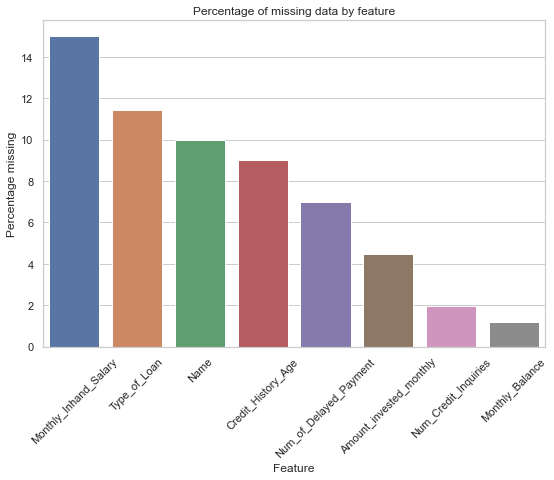

In [267]:
missing_pct = (missing_values_df / len(df)) * 100 # Percentage of misisng values
missing_pct = missing_pct.drop(missing_pct[missing_pct == 0].index)
missing_pct = missing_pct.sort_values(ascending=False)

#Drawing bar plot
plt.figure(figsize=(9, 6)) 
plt.xticks(rotation='45')
sns.barplot(x=missing_pct.index, y=missing_pct)
plt.title('Percentage of missing data by feature')
plt.xlabel('Feature')
plt.ylabel('Percentage missing')
plt.show()

In [268]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [269]:
object_columns=list(df.select_dtypes(include='object').columns) #Categorical columns

In [270]:
df[object_columns].head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,11.27,_,809.98,22 Years and 1 Months,No,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,NaN,No,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,_,Good,809.98,22 Years and 3 Months,No,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,6.27,Good,809.98,22 Years and 4 Months,No,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,22 Years and 5 Months,No,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


# Editing Data Type and Columns

In [271]:
# Define a lambda function
def clean_element(x):
    # If the element is not NaN or not a string, return the element
    if x is np.NaN or not isinstance(x, str):
        return x
    else:
        # If the element is a string, strip any '_', '"', or ',' characters
        # and return the cleaned string
        return str(x).strip('_ ,"')

# Apply the lambda function to each element of the dataframe
df = df.applymap(clean_element)

# Replace any empty strings, 'nan', '!@9#%8', or '#F%$D@*&8' values with NaN
df = df.replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)

In [272]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [273]:
# Convert the ID column to integer
df['ID'] = df.ID.apply(lambda x: int(x, 16))

# Convert the Customer_ID column to integer by extracting the part after the 4th character
df['Customer_ID'] = df.Customer_ID.apply(lambda x: int(x[4:], 16))

# Convert the Age column to integer
df['Age'] = df.Age.astype(int) 

# Convert the SSN column to float, by removing the hyphens and converting to float
df['SSN'] = df.SSN.apply(lambda x: x if x is np.NaN else float(str(x).replace('-', ''))).astype(float)

# Convert the remaining columns to float
df['Annual_Income'] = df.Annual_Income.astype(float)
df['Num_of_Loan'] = df.Num_of_Loan.astype(int) 
df['Num_of_Delayed_Payment'] = df.Num_of_Delayed_Payment.astype(float)
df['Changed_Credit_Limit'] = df.Changed_Credit_Limit.astype(float)
df['Outstanding_Debt'] = df.Outstanding_Debt.astype(float)
df['Amount_invested_monthly'] = df.Amount_invested_monthly.astype(float)
df['Monthly_Balance'] = df.Monthly_Balance.astype(float)

In [274]:
def Month_Converter(x):
    # Check if the input is not null
    if pd.notnull(x):
        # Split the string by space and extract the first and fourth elements
        num1 = (x.split(' ')[0])
        num2 = (x.split(' ')[3])
      
        # Return the sum of `num1` as integer and `num2` as float divided by 10 times the length of `num2`
        return (int(num1)) + (int(num2) / (10 * len(num2)))
    else:
        # Return the original input
        return x

In [275]:
df['Credit_History_Age'] = df.Credit_History_Age.apply(lambda x: Month_Converter(x)).astype(float)

In [276]:
df.shape

(100000, 28)

In [277]:
object_columns=list(df.select_dtypes(include='object').columns)
df[object_columns].head()

,Month,Name,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,January,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,No,High_spent_Small_value_payments,Good
1,February,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Large_value_payments,Good
2,March,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Medium_value_payments,Good
3,April,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Small_value_payments,Good
4,May,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,High_spent_Medium_value_payments,Good


In [278]:
# create a list of column names for numerical columns
num_cols = [col for col in df.columns if df[col].dtype in ["int64", "float64"]]

# display the first 5 rows of the numerical columns
df[num_cols].head()

,ID,Customer_ID,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,5634,3392,821000265.0,19114.12,1824.843333,3,4,3,3,7.0,11.27,4.0,809.98,26.822620,22.1,49.574949,80.415295,312.494089
1,5635,3392,821000265.0,19114.12,NaN,3,4,3,-1,NaN,11.27,4.0,809.98,31.944960,NaN,49.574949,118.280222,284.629162
2,5636,3392,821000265.0,19114.12,NaN,3,4,3,3,7.0,NaN,4.0,809.98,28.609352,22.3,49.574949,81.699521,331.209863
3,5637,3392,821000265.0,19114.12,NaN,3,4,3,5,4.0,6.27,4.0,809.98,31.377862,22.4,49.574949,199.458074,223.451310
4,5638,3392,821000265.0,19114.12,1824.843333,3,4,3,6,NaN,11.27,4.0,809.98,24.797347,22.5,49.574949,41.420153,341.489231


# Missing data

In [279]:
def columns_with_missing_values(DataFrame):
    # Calculate the number of missing values in each column
    missing_columns = DataFrame.isnull().sum()
    
    # Return the columns with missing values
    return missing_columns[missing_columns > 0]

# Call the function on the dataframe
missing_cols = columns_with_missing_values(df)

In [280]:
missing_columns=(df.isnull().sum())
(missing_columns[missing_columns > 0]).index

Index(['Name', 'SSN', 'Occupation', 'Monthly_Inhand_Salary', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Credit_History_Age',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [281]:
# Find the columns with missing values
missing_columns = columns_with_missing_values(df)

# Select the numerical columns with missing values
miss_num_columns = list(df[missing_columns.index].select_dtypes(include=["int64","float64"]).columns)

# Select the object columns with missing values
miss_object_columns = list(df[missing_columns.index].select_dtypes(include='object').columns)


In [282]:
df.shape

(100000, 28)

# Detect Outliers and Fill NaN Values for Every columns

In [283]:
miss_num_columns = list(df[(missing_columns[missing_columns > 0]).index].select_dtypes(include=["int64","float64"]).columns)
miss_num_columns

['SSN',
 'Monthly_Inhand_Salary',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_History_Age',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [284]:
def Distribution2(column, data, i):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    font_dict = {'fontsize': 14}
    title = ['Before Distribution', 'After Distribution']
    ax = np.ravel(ax)
    if i == 1:
        sns.set(style='whitegrid')
        sns.kdeplot(data=data, x=column, ax=ax[0], color='r').set_title(title[i], fontdict=font_dict)
        sns.boxplot(data=data, x=column, ax=ax[1], palette='magma').set_title(title[i], fontdict=font_dict)
    else:
        sns.set(style='whitegrid')
        sns.kdeplot(data=data, x=column, ax=ax[0]).set_title(title[i], fontdict=font_dict)
        sns.boxplot(data=data, x=column, ax=ax[1] ).set_title(title[i], fontdict=font_dict)
    ax = np.reshape(ax, (1, 2))
    plt.tight_layout()


In [285]:
data=df.copy()#coping dataset in new variable

# SSN

In [286]:
data.drop('SSN',axis=1,inplace=True) # dropping redundant column

In [287]:
data.shape

(100000, 27)

# Monthly_Inhand_Salary

**Treating Outliers for every variables and replacing with mode**

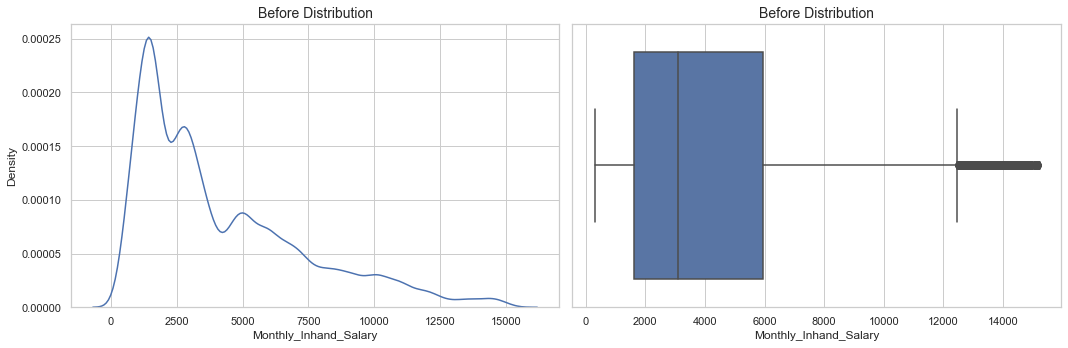

In [288]:
Distribution2(column='Monthly_Inhand_Salary',data=data,i=0)

In [289]:
def fill_monthly_inhand_salary(row, data):
    if pd.isnull(row['Monthly_Inhand_Salary']):
        similar_salaries = data[data['Customer_ID'] == row['Customer_ID']]['Monthly_Inhand_Salary'].dropna()
        mode = similar_salaries.mode()
        if len(mode) > 0:
            return mode.iloc[0]
        else:
            return np.NaN
    else:
        return row['Monthly_Inhand_Salary']


In [290]:
data['Monthly_Inhand_Salary'] = data.apply(fill_monthly_inhand_salary, axis=1, args=(data,))

In [291]:
#Detect Outliers
print(data[data['Monthly_Inhand_Salary']>= 13500].shape)
data=data[data.Monthly_Inhand_Salary < 13500]

(1280, 27)


In [292]:
data.shape

(98720, 27)

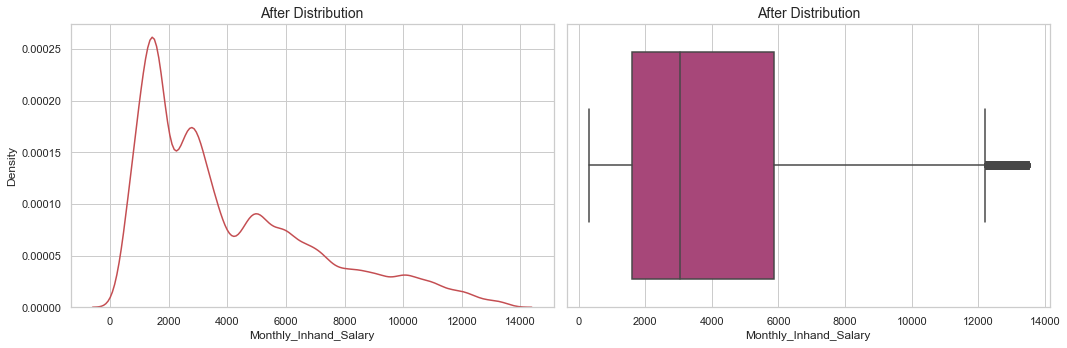

In [293]:
Distribution2(column='Monthly_Inhand_Salary',data=data,i=1)

# Num_of_Delayed_Payment

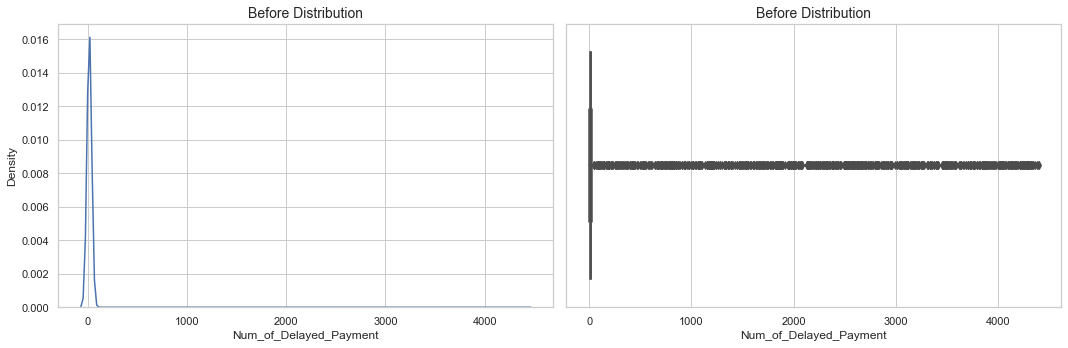

In [294]:
Distribution2(column='Num_of_Delayed_Payment',data=data,i=0)

In [295]:
def fill_num_of_delayed_payments(row, data):
    if pd.isnull(row['Num_of_Delayed_Payment']):
        similar_payments = data[data['Customer_ID'] == row['Customer_ID']]['Num_of_Delayed_Payment'].dropna()
        mode = similar_payments.mode()
        if len(mode) > 0:
            return mode.iloc[0]
        else:
            return np.NaN
    else:
        return row['Num_of_Delayed_Payment']


In [296]:
data['Num_of_Delayed_Payment'] = data.apply(fill_num_of_delayed_payments, axis=1, args=(data,))


In [297]:
print(data[data['Num_of_Delayed_Payment']>=150].shape)
print(data[data['Num_of_Delayed_Payment'] < 0].shape)
data=data[data['Num_of_Delayed_Payment']< 150]
data=data[data['Num_of_Delayed_Payment'] >= 0]

(703, 27)
(624, 27)


In [298]:
data.shape

(97393, 27)

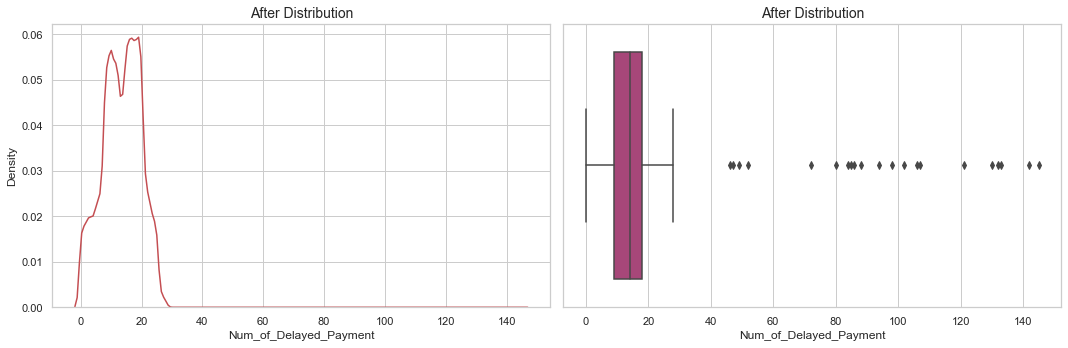

In [299]:
Distribution2(column='Num_of_Delayed_Payment',data=data,i=1)

# Changed_Credit_Limit

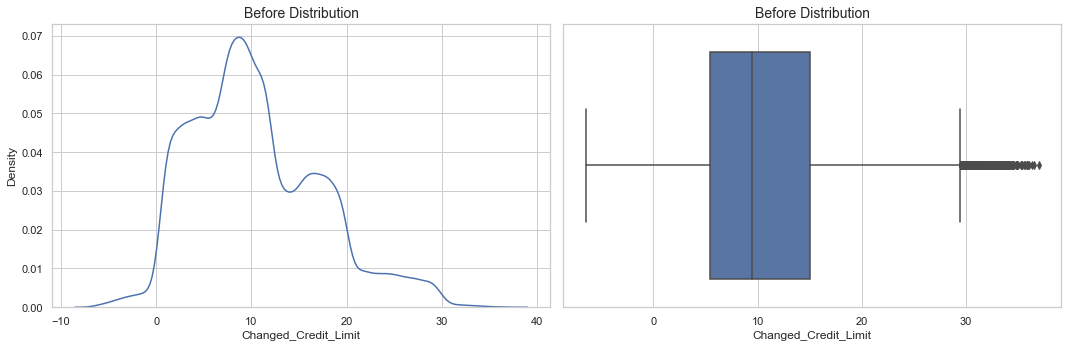

In [300]:
Distribution2(column='Changed_Credit_Limit',data=data,i=0)

In [301]:
def fill_changed_credit_limit(row, data):
    # Check if the Changed_Credit_Limit column is null
    if pd.isnull(row['Changed_Credit_Limit']):
        # Get the Changed_Credit_Limit values for customers with the same Customer_ID
        similar_limits = data[data['Customer_ID'] == row['Customer_ID']]['Changed_Credit_Limit'].dropna()
        # Get the mode of the Changed_Credit_Limit values for similar customers
        mode = similar_limits.mode()
        # Check if the mode is not empty
        if len(mode) > 0:
            # Return the first value of the mode
            return mode.iloc[0]
        else:
            # Return NaN if the mode is empty
            return np.NaN
    else:
        # Return the original value if the Changed_Credit_Limit column is not null
        return row['Changed_Credit_Limit']


In [302]:
data['Changed_Credit_Limit'] = data.apply(fill_changed_credit_limit, axis=1, args=(data,))


In [303]:
print(data[data['Changed_Credit_Limit']>=30].shape)
data=data[data['Changed_Credit_Limit'] < 30]

(254, 27)


In [304]:
data.shape

(97139, 27)

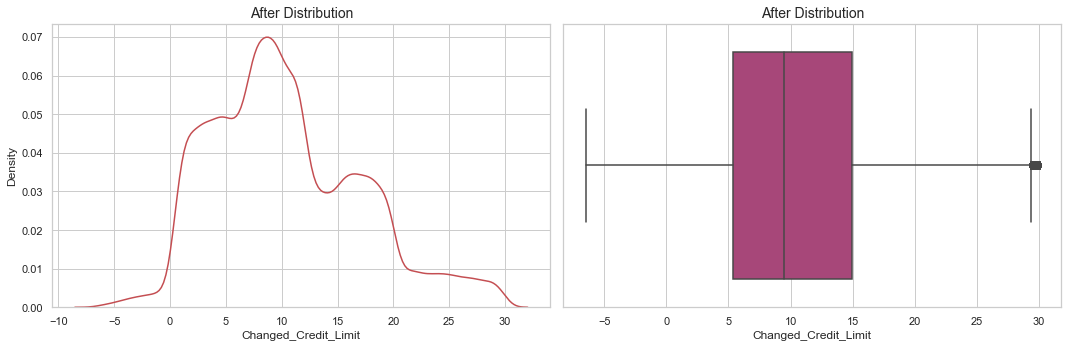

In [305]:
Distribution2(column='Changed_Credit_Limit',data=data,i=1)

# Num_Credit_Inquiries

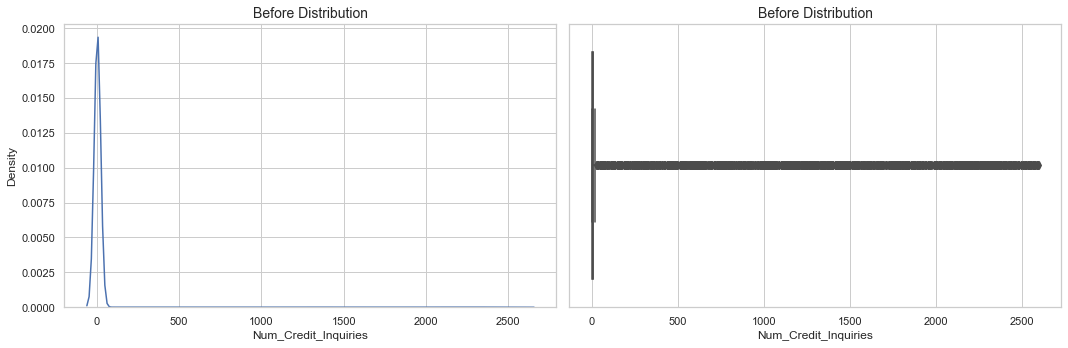

In [306]:
Distribution2(column='Num_Credit_Inquiries',data=data,i=0)

In [307]:
def fill_num_credit_inquiries(row, data):
    # If the number of credit inquiries for the current row is null
    if pd.isnull(row['Num_Credit_Inquiries']):
        # Get the mode of the number of credit inquiries for all records with the same customer ID
        num_credit_inquiries = (
            data[data['Customer_ID'] == row['Customer_ID']]['Num_Credit_Inquiries'].dropna()
        ).mode()
        
        try:
            # If the mode is not empty, return the first (and only) value
            return num_credit_inquiries[0]
        except:
            # If the mode is empty, return NaN
            return np.NaN
    else:
        # If the number of credit inquiries for the current row is not null, return it as is
        return row['Num_Credit_Inquiries']


In [308]:
data['Num_Credit_Inquiries'] = data.apply(fill_num_credit_inquiries, axis=1, data=data)

In [309]:
print(data[data['Num_Credit_Inquiries']>=50].shape)
data=data[data['Num_Credit_Inquiries']<50]

(1590, 27)


In [310]:
data.shape

(95549, 27)

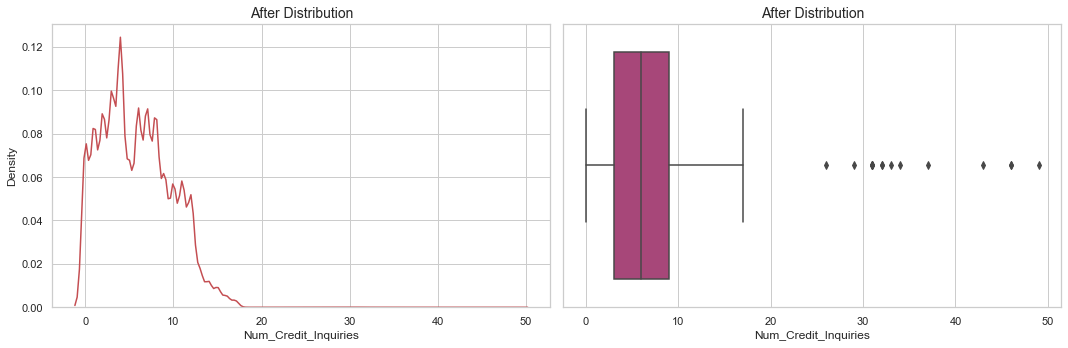

In [311]:
Distribution2(column='Num_Credit_Inquiries',data=data,i=1)

# Credit_History_Age

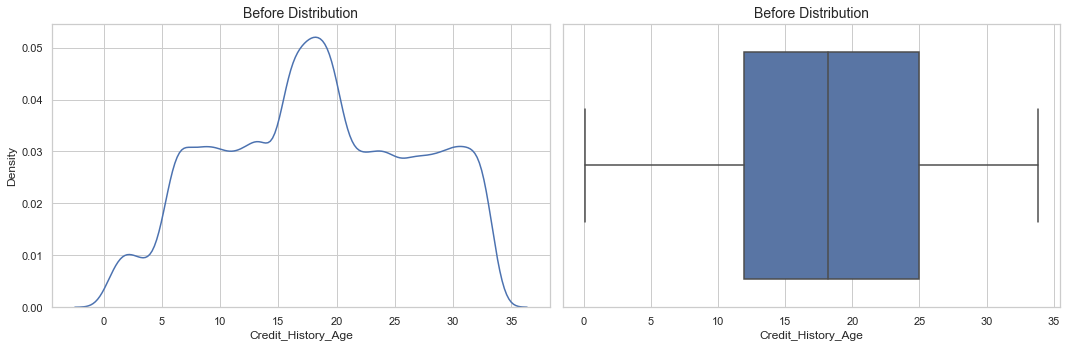

In [312]:
Distribution2(column='Credit_History_Age',data=data,i=0)

In [313]:
def fill_credit_history_age(row, data):
    if pd.isnull(row['Credit_History_Age']):
        credit_history_age = (data[data['Customer_ID'] == row['Customer_ID']]['Credit_History_Age'].dropna()).mode()
        try:
            return credit_history_age[0]
        except:
            return np.NaN
    else:
        return row['Credit_History_Age']


In [314]:
data['Credit_History_Age']=data.apply(fill_credit_history_age,axis=1,data=data)

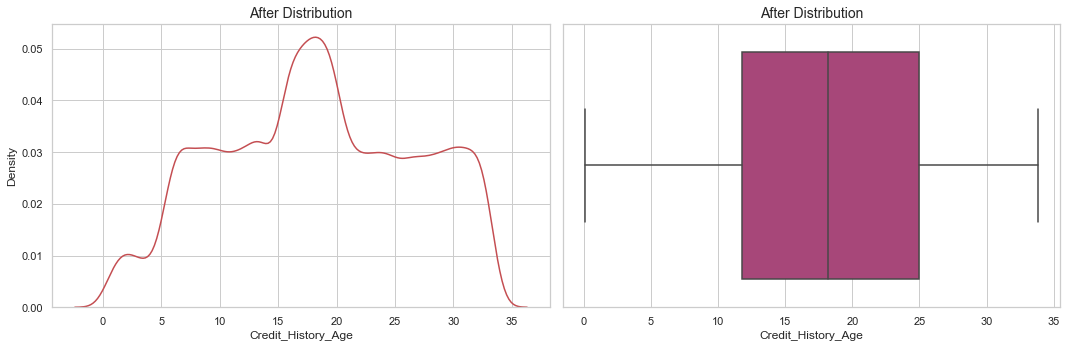

In [315]:
Distribution2(column='Credit_History_Age',data=data,i=1)

# Amount_invested_monthly

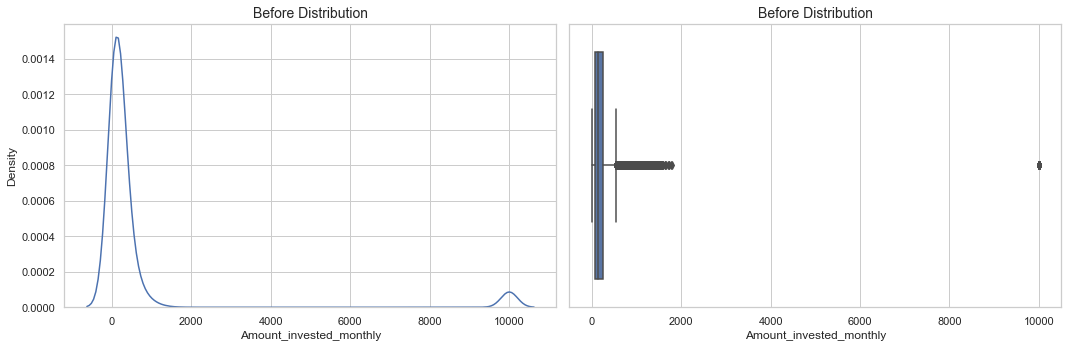

In [316]:
Distribution2(column='Amount_invested_monthly',data=data,i=0)

In [317]:
def fill_missing_Amount_invested_monthly(row):
    if pd.isnull(row['Amount_invested_monthly']):
        customer_id = row['Customer_ID']
        customer_data = data[data['Customer_ID'] == customer_id]
        customer_investment = customer_data['Amount_invested_monthly'].dropna()
        mode = customer_investment.mode()
        try:
            return mode[0]
        except:
            return np.NaN
    else:
        return row['Amount_invested_monthly']



In [318]:
data['Amount_invested_monthly'] = data.apply(fill_missing_Amount_invested_monthly, axis=1)


In [319]:
print(data[data['Amount_invested_monthly']>=1000].shape)
data=data[data['Amount_invested_monthly']<1000]

(4907, 27)


In [320]:
data.shape

(90642, 27)

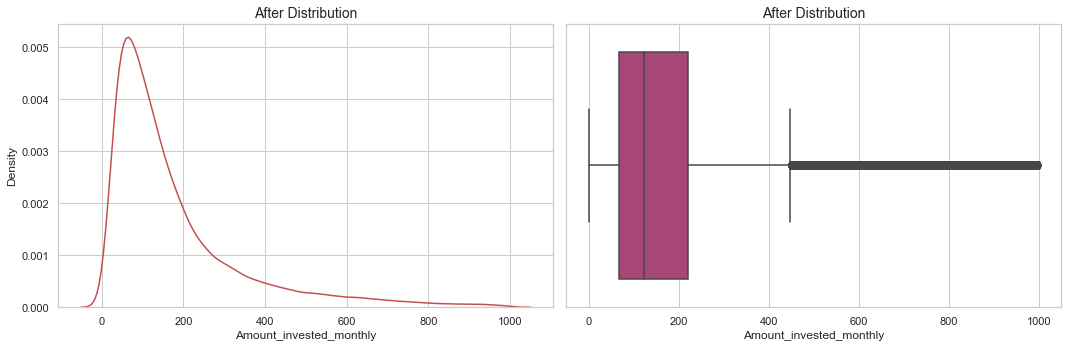

In [321]:
Distribution2(column='Amount_invested_monthly',data=data,i=1)

# Monthly_Balance

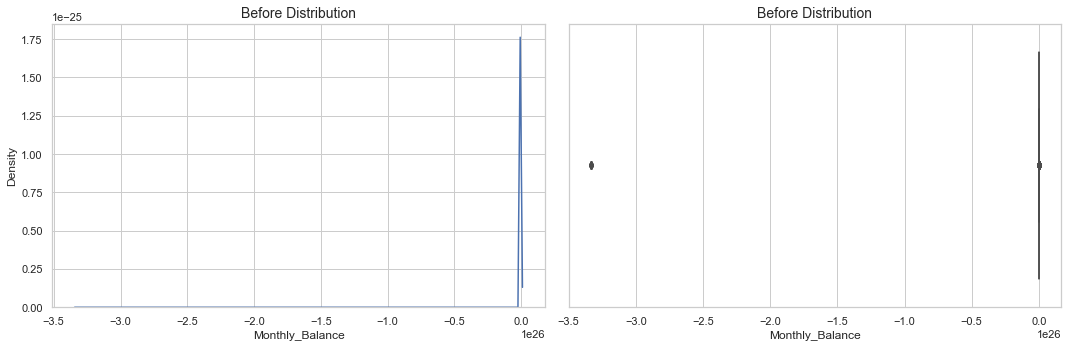

In [322]:
Distribution2(column='Monthly_Balance',data=data,i=0)

In [323]:
def get_Monthly_Balance(row):
    # check if the 'Monthly_Balance' column for the current row is null
    if pd.isnull(row['Monthly_Balance']):
        # if it is null, then find the mode of all the non-null 'Monthly_Balance' values for the same customer ID
        Monthly_Balance=(data[data['Customer_ID']==row['Customer_ID']]['Monthly_Balance'].dropna()).mode()
        # try to return the first (and most common) value
        try:
            return Monthly_Balance[0]
        except:
            # if there are no values to return, then return NaN
            return np.NaN
    else:
        # if the 'Monthly_Balance' column is not null, then return the value in that column
        return row['Monthly_Balance']


In [324]:
data['Monthly_Balance']=data.apply(get_Monthly_Balance,axis=1)


In [325]:
print(data[data['Monthly_Balance'] <= 0].shape)
data = data[data['Monthly_Balance'] > 0]

(9, 27)


In [326]:
data.shape

(90633, 27)

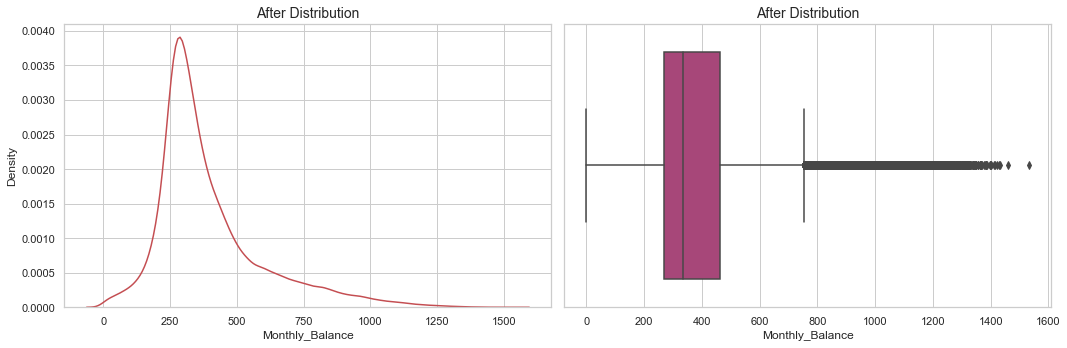

In [327]:
Distribution2(column='Monthly_Balance',data=data,i=1)

In [328]:
missing_columns=data.isnull().sum()
miss_num_columns = list(data[(missing_columns[missing_columns > 0]).index].select_dtypes(include=["int64","float64"]).columns)
miss_num_columns

[]

In [329]:
columns_with_missing_values(data)

Name                  9035
Occupation            6395
Type_of_Loan         10220
Credit_Mix           18297
Payment_Behaviour     6894
dtype: int64

In [330]:
miss_object_columns=list(df[(missing_columns[missing_columns > 0]).index].select_dtypes(include='object').columns)
miss_object_columns

['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_Behaviour']

# Occupation

In [331]:
def get_Occupation(row):
    # Check if the Occupation column in the current row is missing
    if pd.isnull(row['Occupation']):
        # If it is missing, get the mode of the Occupation column for the same customer
        Occupation=(data[data['Customer_ID']==row['Customer_ID']]['Occupation'].dropna()).mode()
        # Try to return the first value of the mode, if not return NaN
        try:
            return Occupation[0]
        except:
            return np.NaN
    # If the Occupation column in the current row is not missing, return its value
    else:
        return row['Occupation']


In [332]:
data['Occupation']=data.apply(get_Occupation,axis=1)

In [333]:
data[data['Occupation'].isnull()]

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [334]:
data['Occupation'] = data['Occupation'].fillna(data['Occupation'].mode()[0])

In [335]:
len(data[data['Occupation'].isnull()])

0

# Type_of_Loan

In [336]:
data.head(2)

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,January,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,NaN,809.98,26.82262,22.1,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,February,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.0,11.27,4.0,Good,809.98,31.94496,22.1,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good


In [337]:
data['Type_of_Loan'] = data['Type_of_Loan'].fillna('Not Specified')

In [338]:
def get_Diff_Values_Colum(df_data):
    valu=['Auto Loan','Credit-Builder Loan','Debt Consolidation Loan','Home Equity Loan','Mortgage Loan','Not Specified',
          'Payday Loan','Personal Loan','Student Loan']
    for x in valu:
        df_data[x] = np.NAN
        
    index=0
    for i in df_data['Type_of_Loan']:
        diff_value=[]
        if  ',' not in i:
            diff_value.append(i.strip())
        else:
            for data in map(lambda x:x.strip(), i.replace('and','').split(',')):
                if not data in diff_value:
                    diff_value.append(data)
        
        for x in valu:
            if x in diff_value:
                df_data[x].iloc[index]=1
        index=index+1
        
    for x in valu:
        df_data[x] = df_data[x].fillna(0)
        df_data[x] = df_data[x].astype(int) 
    return df_data

data=get_Diff_Values_Colum(data)

In [339]:
data.drop('Type_of_Loan',axis=1,inplace=True)

In [340]:
data.head(2)

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,5634,3392,January,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,NaN,809.98,26.82262,22.1,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,1,1,0,1,0,0,0,1,0
1,5635,3392,February,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,-1,4.0,11.27,4.0,Good,809.98,31.94496,22.1,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,1,1,0,1,0,0,0,1,0


# Credit_Mix

In [341]:
def fill_credit_mix(row, data):
    customer_id = row["Customer_ID"]
    if pd.isnull(row["Credit_Mix"]):
        customer_data = data[data["Customer_ID"] == customer_id]
        credit_mix = customer_data["Credit_Mix"].dropna().mode()
        if len(credit_mix) > 0:
            return credit_mix.iloc[0]
        else:
            return np.NaN
    else:
        return row["Credit_Mix"]


In [342]:
data['Credit_Mix']=data.apply(fill_credit_mix,axis=1,data=data)

In [343]:
data['Credit_Mix'] = data['Credit_Mix'].fillna(data['Credit_Mix'].mode()[0])

In [344]:
data['Credit_Mix'].isnull().sum()

0

# Payment_Behaviour

In [345]:
def fill_payment_behavior(row, data):
    customer_id = row["Customer_ID"]
    if pd.isnull(row["Payment_Behaviour"]):
        customer_data = data[data["Customer_ID"] == customer_id]
        payment_behavior = customer_data["Payment_Behaviour"].dropna().mode()
        if len(payment_behavior) > 0:
            return payment_behavior.iloc[0]
        else:
            return np.NaN
    else:
        return row["Payment_Behaviour"]


In [346]:
data['Payment_Behaviour']=data.apply(fill_payment_behavior,axis=1,data=data)

In [347]:
data['Payment_Behaviour'] = data['Payment_Behaviour'].fillna(data['Payment_Behaviour'].mode()[0])

In [348]:
data['Payment_Behaviour'].isnull().sum()

0

In [349]:
columns_with_missing_values(data)

Name    9035
dtype: int64

In [350]:
num_columns = list(data.select_dtypes(include=["int64","float64",'int32']).columns)
num_columns=num_columns[2:-9]

In [351]:
process=['Monthly_Inhand_Salary','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries',
         'Credit_History_Age','Amount_invested_monthly','Monthly_Balance']

In [352]:
for i in num_columns:
    if i not in process:
        print(i)

Age
Annual_Income
Num_Bank_Accounts
Num_Credit_Card
Interest_Rate
Num_of_Loan
Delay_from_due_date
Outstanding_Debt
Credit_Utilization_Ratio
Total_EMI_per_month


# Age

**Age has above 8000 values therefore replace the values that are above 100 or 85 
with mode value**

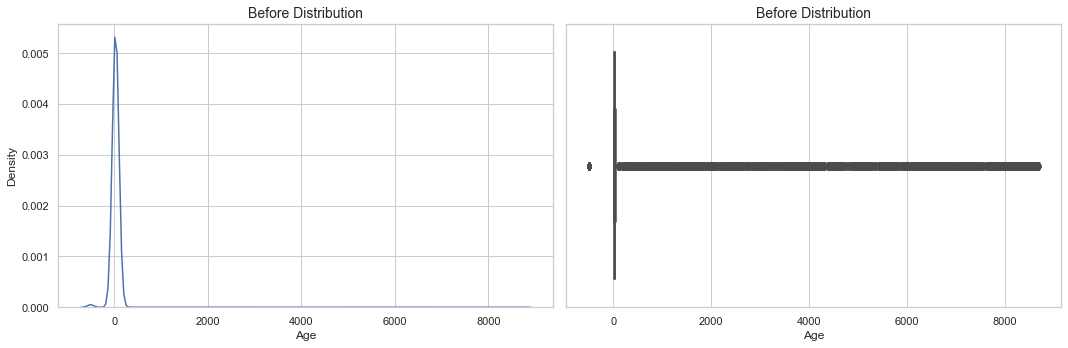

In [353]:
Distribution2(column='Age',data=data,i=0)

In [354]:
print(data[data['Age'] > 85].shape)

(1714, 35)


In [355]:
def fill_age(row, data):
    customer_id = row["Customer_ID"]
    age = row["Age"]
    if age > 85 or age < 0:
        customer_data = data[data["Customer_ID"] == customer_id]
        age_mode = customer_data["Age"].dropna().mode()
        if len(age_mode) > 0:
            return age_mode.iloc[0]
        else:
            return np.NaN
    else:
        return age


In [356]:
data['Age']=data.apply(fill_age,axis=1,data=data)

In [357]:
data[data['Age'] > 85].sort_values('Age')

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan


In [358]:
data.drop(data[data['Age'] > 85].index,axis=0,inplace=True)

In [359]:
data[data['Age'] < 0].sort_values('Age')

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
45664,74130,28583,January,Groomp,-500,Developer,99403.32,8347.61,0,3,11,3,9,9.0,0.72,1.0,Good,904.93,40.884276,23.40,No,130.619711,325.109918,High_spent_Medium_value_payments,629.031372,Good,0,0,0,1,1,0,1,0,0
45665,74131,28583,February,Groomp,-500,Developer,99403.32,8347.61,0,3,11,3,5,9.0,0.72,1.0,Good,904.93,28.185199,23.50,No,130.619711,308.567185,High_spent_Medium_value_payments,645.574105,Good,0,0,0,1,1,0,1,0,0
45669,74135,28583,June,Groomp,-500,Developer,99403.32,8347.61,0,3,11,3,8,9.0,0.72,1.0,Good,904.93,34.870185,23.90,No,130.619711,426.690980,Low_spent_Medium_value_payments,557.450309,Standard,0,0,0,1,1,0,1,0,0
45671,74137,28583,August,Groomp,-500,Developer,99403.32,8347.61,0,3,11,3,9,9.0,0.72,1.0,Good,904.93,39.074470,23.55,No,130.619711,118.730491,High_spent_Medium_value_payments,835.410798,Standard,0,0,0,1,1,0,1,0,0


In [360]:
data.drop(data[data['Age']  < 0].index,axis=0,inplace=True)

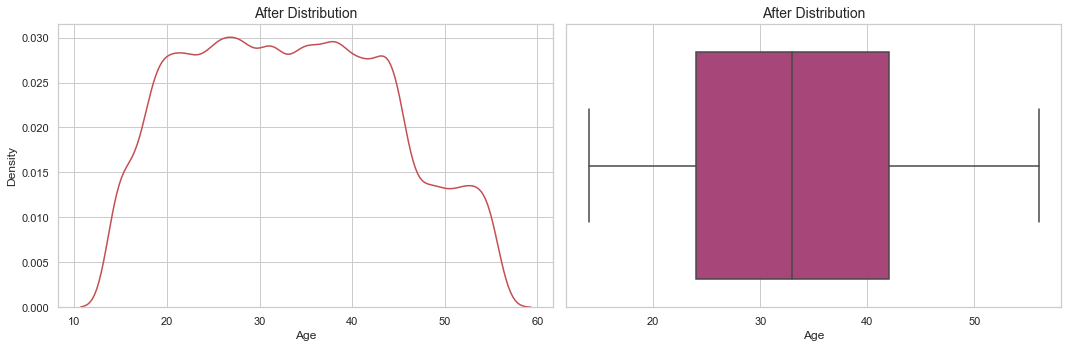

In [361]:
Distribution2(column='Age',data=data,i=1)

# Annual_Income

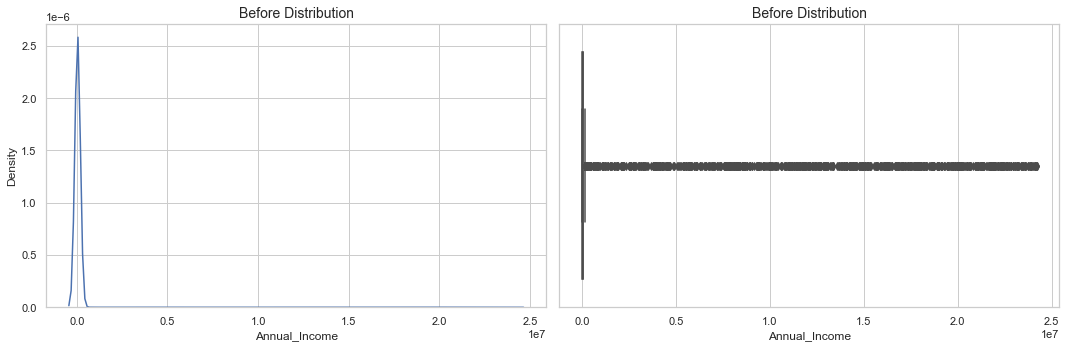

In [362]:
Distribution2(column='Annual_Income',data=data,i=0)

In [363]:
def fill_annual_income(row, data):
    customer_id = row["Customer_ID"]
    annual_income = row["Annual_Income"]
    if annual_income > 150000:
        customer_data = data[data["Customer_ID"] == customer_id]
        income_mode = customer_data["Annual_Income"].dropna().mode()
        if len(income_mode) > 0:
            return income_mode.iloc[0]
        else:
            return np.NaN
    else:
        return annual_income


In [364]:
data['Annual_Income']=data.apply(fill_annual_income,axis=1,data=data)

In [365]:
data[data['Annual_Income'] > 165000].sort_values('Annual_Income')

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
56581,90503,15769,June,NaN,46,Accountant,167258.04,12986.315524,5,2,12,0,13,1.0,10.72,2.0,Good,476.64,29.757926,27.00,No,1213.854476,608.969535,Low_spent_Large_value_payments,1081.047465,Good,0,0,0,0,0,1,0,0,0
56582,90504,15769,July,Lionel Laurentb,46,Accountant,167258.04,12986.315524,566,2,12,0,13,1.0,10.72,2.0,Good,476.64,45.109866,27.10,No,1213.854476,464.293793,Low_spent_Large_value_payments,1205.723207,Good,0,0,0,0,0,1,0,0,0
56583,90505,15769,August,Lionel Laurentb,46,Accountant,167258.04,12986.315524,5,1123,12,0,13,0.0,10.72,2.0,Good,476.64,26.568010,27.00,No,1213.854476,963.127698,Low_spent_Large_value_payments,726.889302,Good,0,0,0,0,0,1,0,0,0
36013,59651,21693,June,Nick Edwardsv,26,Journalist,167753.52,13102.045569,3,3,12,3,7,7.0,4.62,2.0,Good,1079.59,41.106992,29.10,No,1190.730221,225.515481,High_spent_Large_value_payments,1160.714729,Good,0,0,0,0,1,1,0,1,0
35477,58847,41452,June,Danielr,51,Teacher,171292.56,12574.940065,1,5,9,3,3,1.0,5.49,4.0,Good,393.01,45.132045,31.90,No,1779.103254,398.840854,Low_spent_Large_value_payments,994.533827,Good,1,0,1,0,0,0,1,0,0
35478,58848,41452,July,Danielr,51,Teacher,171292.56,12574.940065,1,5,9,-100,6,4.0,5.49,4.0,Good,393.01,31.889407,32.30,No,1779.103254,327.980626,High_spent_Medium_value_payments,1045.394055,Standard,1,0,1,0,0,0,1,0,0
35479,58849,41452,August,Danielr,52,Teacher,171292.56,12574.940065,1,5,9,3,3,1.0,5.49,4.0,Good,393.01,40.146312,32.40,No,1779.103254,503.449545,High_spent_Medium_value_payments,869.925136,Good,1,0,1,0,0,0,1,0,0
9378,19700,13909,March,Ransdellw,29,Lawyer,177907.72,13078.430052,0,6,6,0,8,10.0,10.76,0.0,Good,685.01,40.275432,30.90,No,1634.213281,668.401726,Low_spent_Large_value_payments,1072.862608,Poor,0,0,0,0,0,1,0,0,0
9379,19701,13909,April,Ransdellw,29,Lawyer,177907.72,13078.430052,0,6,6,0,8,8.0,10.76,0.0,Good,685.01,44.798586,30.50,No,1634.213281,291.345581,High_spent_Medium_value_payments,1429.918752,Standard,0,0,0,0,0,1,0,0,0
9380,19702,13909,May,Ransdellw,29,Lawyer,177907.72,13078.430052,0,6,6,0,7,8.0,16.76,0.0,Good,685.01,33.439295,30.55,No,1634.213281,463.706400,High_spent_Small_value_payments,1267.557933,Standard,0,0,0,0,0,1,0,0,0


In [366]:
data.drop(data[data['Annual_Income']  > 165000].index,axis=0,inplace=True)

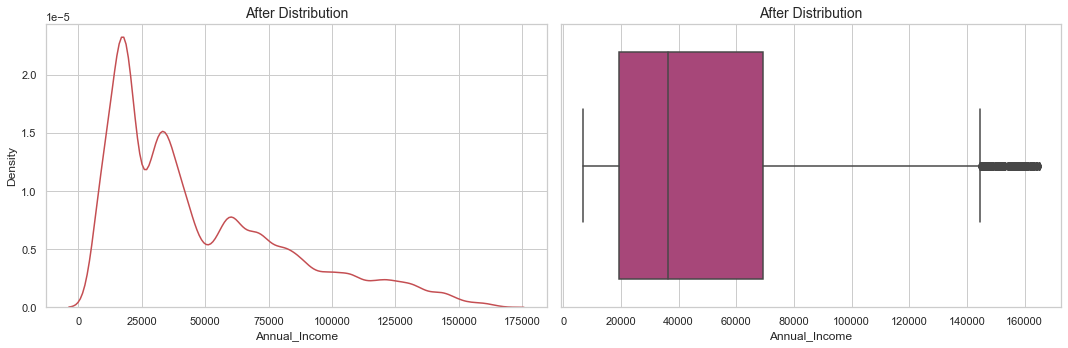

In [367]:
Distribution2(column='Annual_Income',data=data,i=1)

# Num_Bank_Accounts

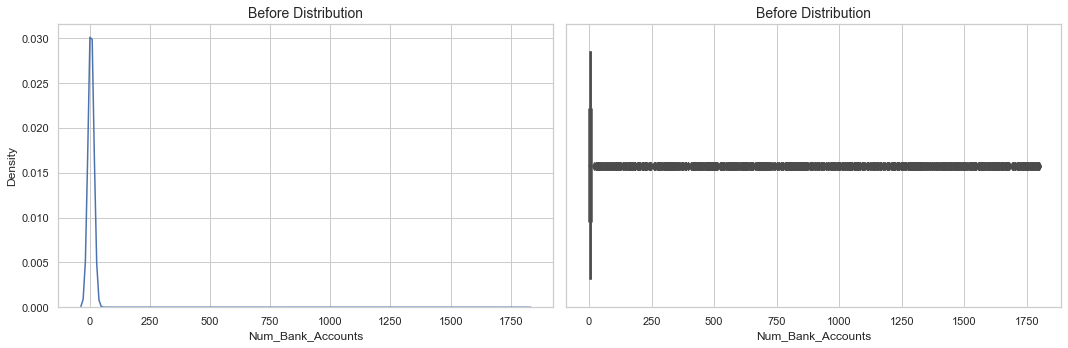

In [368]:
Distribution2(column='Num_Bank_Accounts',data=data,i=0)

In [369]:
def fill_num_bank_accounts(row, data):
    customer_id = row["Customer_ID"]
    num_bank_accounts = row["Num_Bank_Accounts"]
    if num_bank_accounts > 12:
        customer_data = data[data["Customer_ID"] == customer_id]
        accounts_mode = customer_data["Num_Bank_Accounts"].dropna().mode()
        if len(accounts_mode) > 0:
            return accounts_mode.iloc[0]
        else:
            return np.NaN
    else:
        return num_bank_accounts


In [370]:
data['Num_Bank_Accounts']=data.apply(fill_num_bank_accounts,axis=1,data=data)

In [371]:
data[data['Num_Bank_Accounts'] > 12]

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan


In [372]:
data.drop(data[data['Num_Bank_Accounts']  > 12].index,axis=0,inplace=True)
data.drop(data[data['Num_Bank_Accounts']  < 0].index,axis=0,inplace=True)

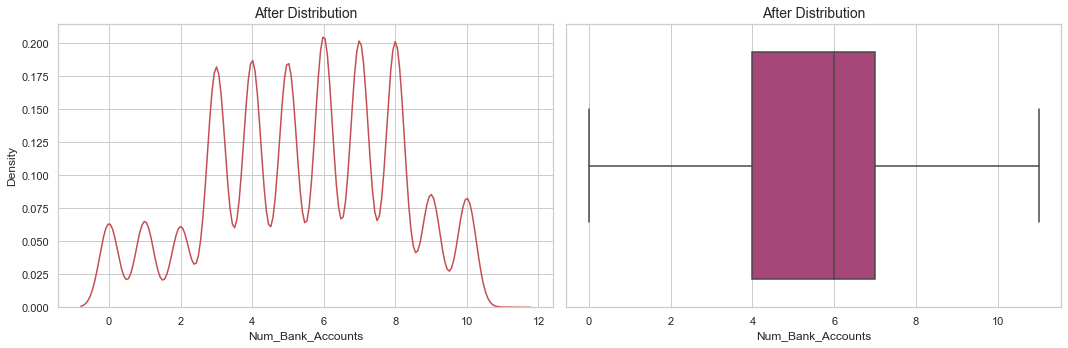

In [373]:
Distribution2(column='Num_Bank_Accounts',data=data,i=1)

# Num_Credit_Card

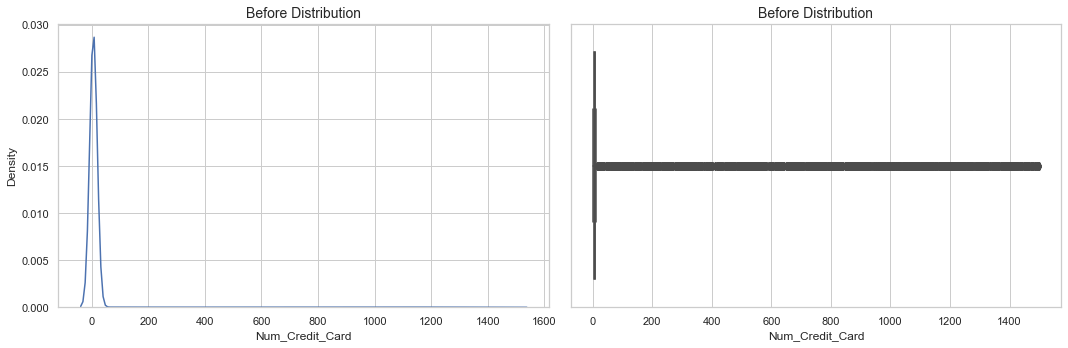

In [374]:
Distribution2(column='Num_Credit_Card',data=data,i=0)

In [375]:
data[data['Num_Credit_Card'] > 14]

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
40,5694,38382,January,Np,31,Lawyer,73928.46,5988.705000,4,1288,8,0,12,10.0,10.14,2.0,Good,548.20,39.962685,32.0,No,15015.000000,98.674410,High_spent_Large_value_payments,740.196090,Good,0,0,0,0,0,1,0,0,0
157,5867,16640,June,Reema,32,Entrepreneur,19300.34,1512.361667,6,1029,17,5,51,17.0,9.95,8.0,Bad,2430.21,25.847791,18.7,Yes,49.572062,83.447449,Low_spent_Large_value_payments,288.216656,Poor,1,0,1,0,1,1,1,0,0
163,5877,4911,April,NaN,41,Musician,19514.88,1828.240000,7,488,17,0,30,12.0,4.17,2.0,Standard,881.40,34.503707,19.6,No,0.000000,45.388820,High_spent_Medium_value_payments,387.435180,Poor,0,0,0,0,0,1,0,0,0
207,5941,19779,August,Reijik,48,Entrepreneur,20787.69,1999.307500,8,1381,14,3,22,14.0,8.13,3.0,Standard,614.60,35.344188,18.5,No,42.221993,21.745531,High_spent_Large_value_payments,375.963226,Standard,0,1,0,1,0,0,0,0,0
215,5953,47455,August,Ashleyk,30,Writer,34290.12,2697.510000,9,898,25,7,52,9.0,13.96,13.0,Standard,2686.81,36.820649,14.3,Yes,185.111983,94.917216,High_spent_Small_value_payments,249.721801,Poor,1,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99605,155039,23917,June,Martinb,38,Writer,126514.72,10341.893333,8,1255,5,3,21,19.0,10.64,0.0,Standard,470.42,29.696182,29.7,No,61447.000000,902.340388,Low_spent_Small_value_payments,109.816092,Good,1,1,0,1,0,0,0,0,0
99611,155049,10281,April,Alistair Barre,31,Journalist,64901.37,5298.447500,3,514,20,-100,14,15.0,2.94,0.0,Standard,442.06,29.639741,31.1,Yes,0.000000,162.171160,High_spent_Medium_value_payments,617.673590,Standard,0,0,0,0,0,1,0,0,0
99615,155053,10281,August,Alistair Barre,32,Journalist,64901.37,5298.447500,3,232,20,0,19,18.0,2.94,3.0,Standard,442.06,29.145534,31.5,Yes,0.000000,126.263036,High_spent_Large_value_payments,643.581714,Standard,0,0,0,0,0,1,0,0,0
99619,155061,44646,April,Jino,30,Writer,142560.36,11773.030000,6,1430,13,1,23,15.0,11.22,0.0,Standard,220.75,34.671699,17.6,No,76.772094,982.946968,Low_spent_Large_value_payments,387.583938,Standard,0,0,0,0,0,0,0,0,1


In [376]:
def fill_num_credit_card(row, data):
    customer_id = row["Customer_ID"]
    num_credit_card = row["Num_Credit_Card"]
    if num_credit_card > 14:
        customer_data = data[data["Customer_ID"] == customer_id]
        credit_card_mode = customer_data["Num_Credit_Card"].dropna().mode()
        if len(credit_card_mode) > 0:
            return credit_card_mode.iloc[0]
        else:
            return np.NaN
    else:
        return num_credit_card


In [377]:
data['Num_Credit_Card']=data.apply(fill_num_credit_card,axis=1,data=data)

In [378]:
data.drop(data[data['Num_Credit_Card']  > 14].index,axis=0,inplace=True)

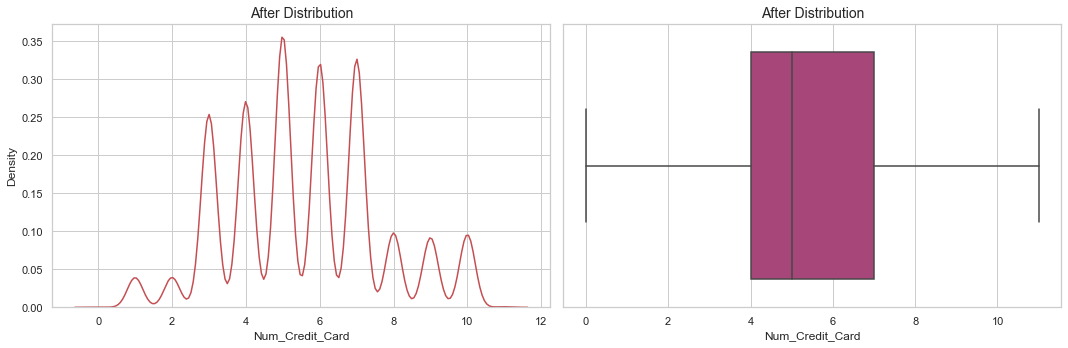

In [379]:
Distribution2(column='Num_Credit_Card',data=data,i=1)

# Interest_Rate

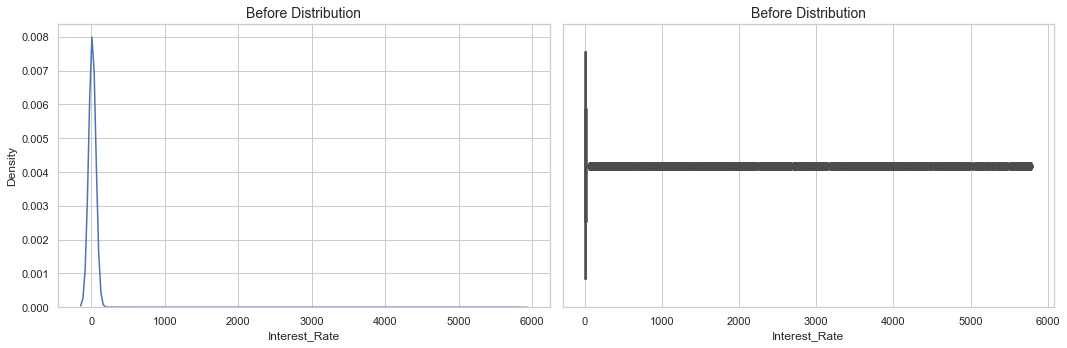

In [380]:
Distribution2(column='Interest_Rate',data=data,i=0)

In [381]:
data[data['Interest_Rate'] > 35].sort_values('Interest_Rate')

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
35442,58796,24464,March,NaN,15,Engineer,12680.815,1334.734583,4,5,59,0,26,11.0,8.79,6.0,Standard,704.18,33.487750,17.55,Yes,0.000000,34.169408,High_spent_Large_value_payments,339.304050,Standard,0,0,0,0,0,1,0,0,0
57905,92491,24226,February,Julien Toyerf,36,Entrepreneur,17869.290,1643.107500,6,3,60,4,30,13.0,10.20,2.0,Standard,276.09,38.310862,27.00,Yes,42.042420,127.532913,Low_spent_Large_value_payments,264.735417,Standard,1,0,0,0,0,1,1,0,0
61480,97854,28633,January,Julien Toyerq,35,Journalist,84050.500,7140.208333,3,5,64,3,2,0.0,7.16,1.0,Good,889.05,31.731434,23.55,No,175.377781,124.043048,High_spent_Large_value_payments,654.600004,Good,0,0,0,1,0,0,0,0,1
18907,33993,23687,April,Lisaz,39,Developer,76395.280,6074.273333,9,8,67,5,21,20.0,22.94,10.0,Bad,3026.97,39.686331,9.20,Yes,208.769613,70.252845,High_spent_Large_value_payments,570.419750,Standard,0,1,0,1,1,1,0,0,0
2648,9606,30096,January,Malathi Nayakw,43,Architect,68665.760,5619.146667,7,6,73,7,6,20.0,7.05,8.0,Standard,420.02,38.630616,12.10,Yes,329.666062,315.972607,Low_spent_Medium_value_payments,196.275998,Standard,0,1,0,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86815,135853,10886,August,Lesleyk,36,Accountant,50817.900,4531.825000,3,6,5774,2,16,15.0,17.05,12.0,Standard,2368.19,39.867715,8.90,NM,47.537232,79.419019,High_spent_Medium_value_payments,576.226249,Poor,0,0,0,1,0,0,0,0,1
77710,122196,9668,July,Zieminskia,40,Accountant,14717.280,1069.440000,5,2,5775,3,9,9.0,5.89,3.0,Good,148.52,28.221988,21.50,No,58962.000000,17.478496,High_spent_Large_value_payments,298.381784,Standard,0,0,0,1,0,0,0,0,1
88505,138391,6568,February,NaN,42,Musician,30683.420,2397.951667,4,6,5776,2,27,6.0,10.62,4.0,Standard,7.24,29.706823,25.50,No,46.884456,64.523403,High_spent_Medium_value_payments,378.387307,Standard,0,0,1,0,0,1,0,0,0
23512,40902,12203,January,Anna Yukhananovd,26,Manager,75804.940,6120.078333,0,1,5788,3,9,8.0,7.89,2.0,Good,330.82,35.641926,31.90,No,141.289448,51.867242,High_spent_Large_value_payments,658.851143,Good,0,1,0,1,1,0,0,0,0


In [382]:
def fill_Interest_Rate(row):
    if row['Interest_Rate'] > 35:
        customer_data = data[data['Customer_ID'] == row['Customer_ID']]
        interest_rate_mode = customer_data['Interest_Rate'].mode()
        if len(interest_rate_mode) > 0:
            return interest_rate_mode.values[0]
        else:
            return np.nan
    else:
        return row['Interest_Rate']

In [383]:
data['Interest_Rate']=data.apply(fill_Interest_Rate,axis=1)

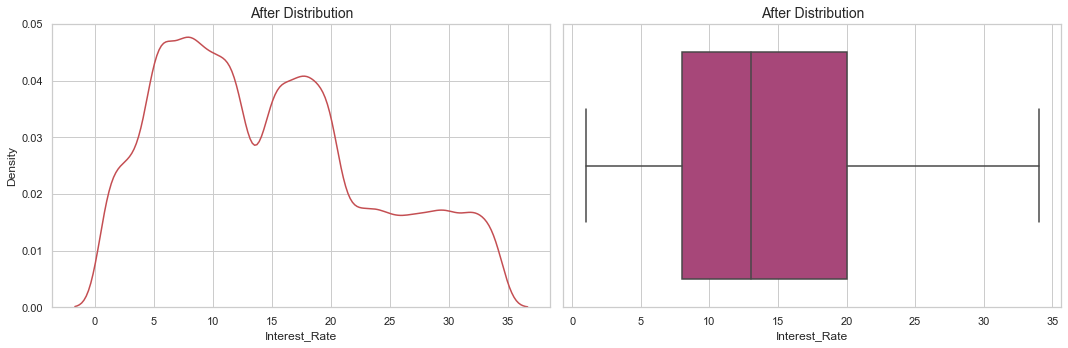

In [384]:
Distribution2(column='Interest_Rate',data=data,i=1)

# Num_of_Loan

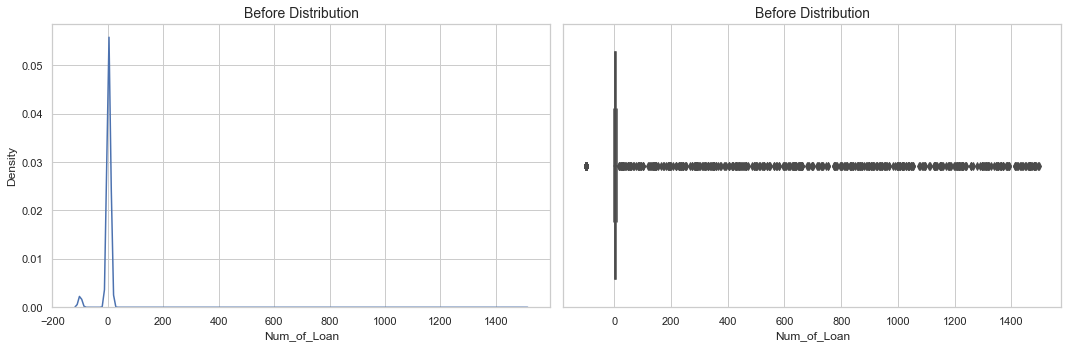

In [385]:
Distribution2(column='Num_of_Loan',data=data,i=0)

In [386]:
def fill_Num_of_Loan(row):
    if row['Num_of_Loan'] > 8 or row['Num_of_Loan'] < 0:
        customer_data = data[data['Customer_ID'] == row['Customer_ID']]
        num_of_loan_mode = customer_data['Num_of_Loan'].mode()
        if len(num_of_loan_mode) > 0:
            return num_of_loan_mode.values[0]
        else:
            return np.nan
    else:
        return row['Num_of_Loan']


In [387]:
data['Num_of_Loan']=data.apply(fill_Num_of_Loan,axis=1)

In [388]:
data.drop(data[data['Num_of_Loan']  < 0].index,axis=0,inplace=True)

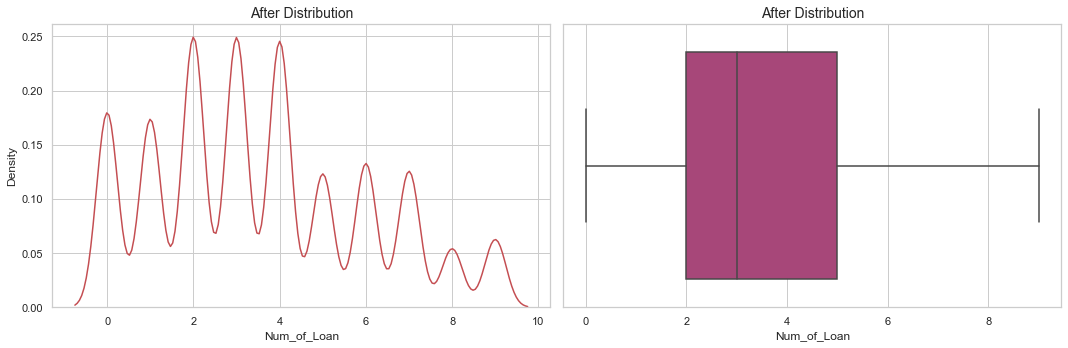

In [389]:
Distribution2(column='Num_of_Loan',data=data,i=1)

# Delay_from_due_date

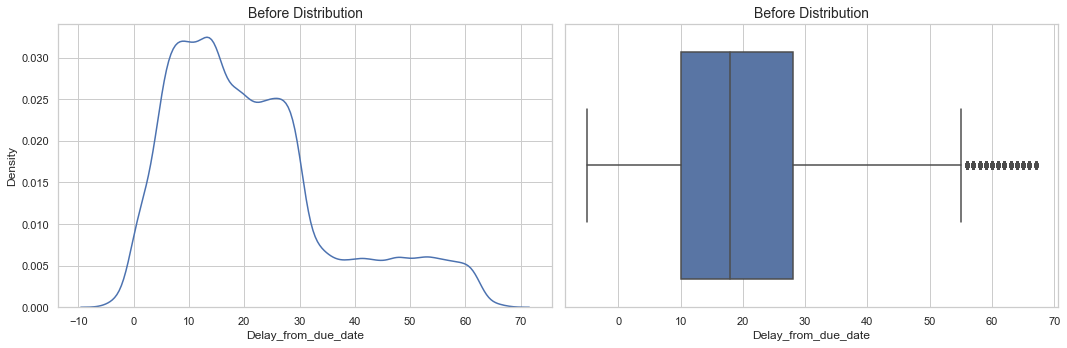

In [390]:
Distribution2(column='Delay_from_due_date',data=data,i=0)

# Credit_Utilization_Ratio

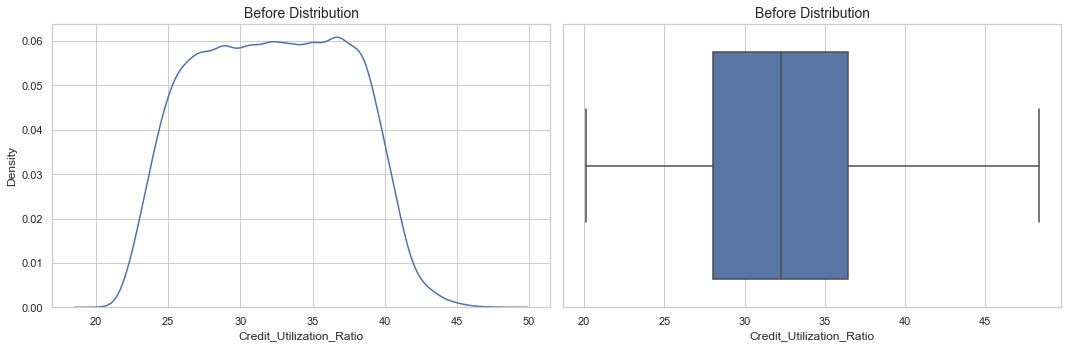

In [391]:
Distribution2(column='Credit_Utilization_Ratio',data=data,i=0)

# Total_EMI_per_month

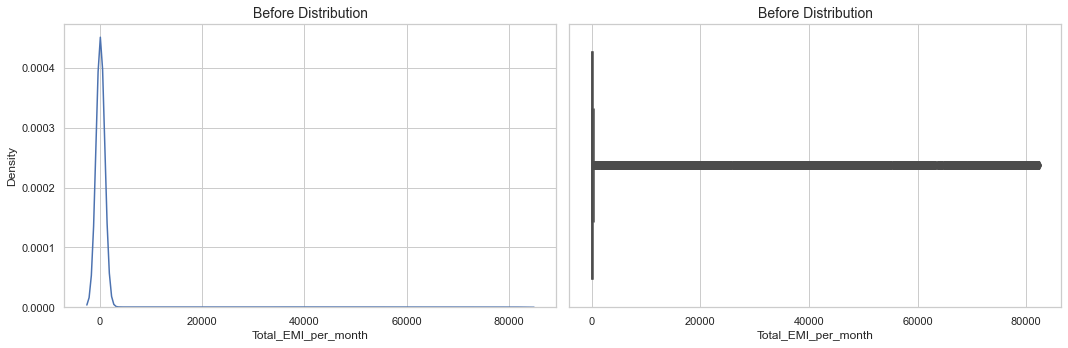

In [392]:
Distribution2(column='Total_EMI_per_month',data=data,i=0)

In [393]:
data=data[data['Total_EMI_per_month']<5000]

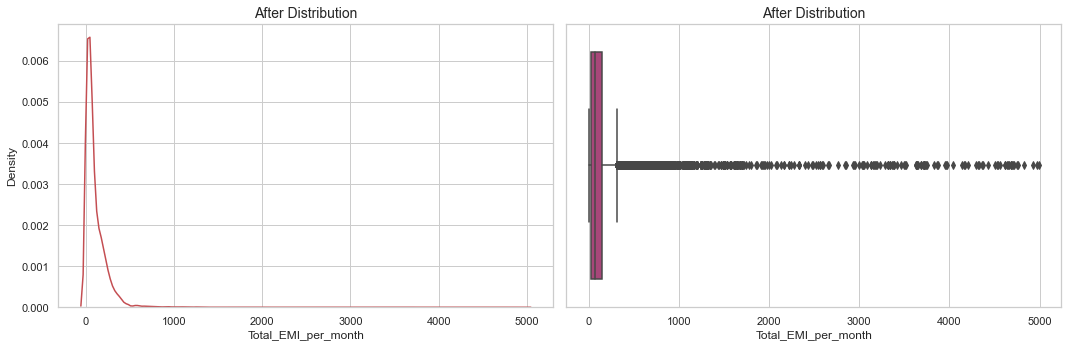

In [394]:
Distribution2(column='Total_EMI_per_month',data=data,i=1)

In [395]:
data.shape

(87865, 35)

In [396]:
data.to_csv("bank_data.csv", index=False)

In [397]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87865 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        87865 non-null  int64  
 1   Customer_ID               87865 non-null  int64  
 2   Month                     87865 non-null  object 
 3   Name                      79092 non-null  object 
 4   Age                       87865 non-null  int64  
 5   Occupation                87865 non-null  object 
 6   Annual_Income             87865 non-null  float64
 7   Monthly_Inhand_Salary     87865 non-null  float64
 8   Num_Bank_Accounts         87865 non-null  int64  
 9   Num_Credit_Card           87865 non-null  int64  
 10  Interest_Rate             87865 non-null  int64  
 11  Num_of_Loan               87865 non-null  int64  
 12  Delay_from_due_date       87865 non-null  int64  
 13  Num_of_Delayed_Payment    87865 non-null  float64
 14  Change

In [398]:
process_df= data.copy()

# Drop unimportant columns

In [399]:
def drop_columns(DataFrame):
    lazy_list=['ID','Customer_ID','Name']
    DataFrame.drop(lazy_list, axis=1, inplace=True)
drop_columns(process_df)

# Encoding categorical features

In [400]:
process_df['Month'] = process_df['Month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [401]:
Occupation_le = LabelEncoder()

process_df['Occupation'] = Occupation_le.fit_transform(process_df['Occupation'])
Occupation_le.classes_

array(['Accountant', 'Architect', 'Developer', 'Doctor', 'Engineer',
       'Entrepreneur', 'Journalist', 'Lawyer', 'Manager', 'Mechanic',
       'Media_Manager', 'Musician', 'Scientist', 'Teacher', 'Writer'],
      dtype=object)

In [402]:
Credit_Mix_le = LabelEncoder()

process_df['Credit_Mix'] = Credit_Mix_le.fit_transform(process_df['Credit_Mix'])
Credit_Mix_le.classes_

array(['Bad', 'Good', 'Standard'], dtype=object)

In [403]:
Payment_Behaviour_le = LabelEncoder()

process_df['Payment_Behaviour'] = Payment_Behaviour_le.fit_transform(process_df['Payment_Behaviour'])
Payment_Behaviour_le.classes_

array(['High_spent_Large_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments'], dtype=object)

In [404]:
Payment_of_Min_Amount_le = LabelEncoder()

process_df['Payment_of_Min_Amount'] = Payment_of_Min_Amount_le.fit_transform(process_df['Payment_of_Min_Amount'])
Payment_of_Min_Amount_le.classes_

array(['NM', 'No', 'Yes'], dtype=object)

# Scaling and Split the data

In [405]:
x = process_df.drop('Credit_Score',axis=1)
y = process_df['Credit_Score']

In [406]:
y_le = LabelEncoder()

y_Encode = y_le.fit_transform(y)
y_le.classes_

array(['Good', 'Poor', 'Standard'], dtype=object)

In [407]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [408]:
pca = PCA(n_components=0.98, svd_solver='full')
reduced_data = pca.fit_transform(x)

original_features = x.shape[1]
reduced_features = reduced_data.shape[1]

print(f"Number of original features: {original_features}")
print(f"Number of reduced features: {reduced_features}")


Number of original features: 31
Number of reduced features: 22


# Model

In [429]:
evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    evals[str(name)] = [train_accuracy, test_accuracy]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Poor', 'Standard','Good'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

In [430]:
def feature_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
    plt.figure(figsize=(15,8))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for Decision Tree')
    plt.show()

In [431]:
features = process_df.drop(['Credit_Score'] , axis = 1)

# Logistic Regression

In [432]:
from sklearn.linear_model import LogisticRegression

In [433]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state = 1234)

In [434]:
lr = LogisticRegression(C = 100)

In [435]:
lr.fit(x_train , y_train)

LogisticRegression(C=100)

In [436]:
lr_score_train=lr.score(x_train , y_train)
lr_score_train

0.6528087147386391

In [437]:
lr_score_test=lr.score(x_test , y_test)
lr_score_test

0.6525037936267072

Training Accuracy Logistic Regression 65.28087147386391  Test Accuracy Logistic Regression 65.25037936267071


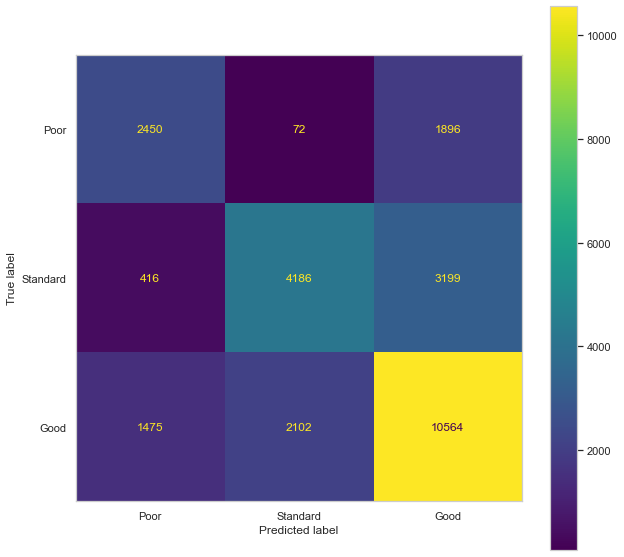

In [438]:
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)

In [439]:
Y_pred=lr.predict(x_test)

In [440]:
pd.DataFrame((lr.coef_).T ,process_df.drop('Credit_Score',axis=1).columns ).T

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,0.355317,0.193643,-0.065580,0.586118,-0.790714,0.027802,-2.021875,-1.591558,-0.729206,-1.930092,0.885535,0.547331,-2.572516,-1.601819,-1.066319,-0.049819,0.591988,-0.329880,3.016373,0.533746,-0.601050,-0.891895,0.009217,0.051275,0.014713,0.026637,0.080863,0.064895,0.033542,-0.023339,0.005471
1,-0.210687,-0.180637,0.049758,-0.355096,0.793871,-0.193417,1.544327,1.616134,0.290766,1.398734,-3.417086,-1.531724,3.927539,0.456459,0.789263,0.000226,-0.576719,0.144911,-1.689925,-0.797735,0.600131,0.446291,0.035880,0.011161,0.007269,-0.007680,-0.021222,-0.031469,0.009380,0.015458,0.049792
2,-0.144630,-0.013006,0.015822,-0.231022,-0.003157,0.165615,0.477548,-0.024576,0.438440,0.531358,2.531551,0.984393,-1.355023,1.145359,0.277056,0.049593,-0.015269,0.184969,-1.326448,0.263989,0.000920,0.445604,-0.045097,-0.062436,-0.021982,-0.018957,-0.059640,-0.033426,-0.042922,0.007882,-0.055262


In [442]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(10).T

,5943,55462,18997,78093,65496,78593,76893,75831,49348,45868
Y_test,Standard,Standard,Poor,Good,Poor,Standard,Standard,Poor,Standard,Standard
Y_pred,Good,Standard,Poor,Standard,Poor,Standard,Standard,Standard,Standard,Standard


# KNN

In [443]:
from sklearn.neighbors import KNeighborsClassifier

In [444]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state = 1234)

In [445]:
knn = KNeighborsClassifier(n_neighbors=7)

In [446]:
knn.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=7)

In [447]:
knn_score_train=knn.score(x_train , y_train)
knn_score_train

0.8030078855377611

In [448]:
knn_score_test=knn.score(x_test , y_test)
knn_score_test

0.7229135053110773

Training Accuracy KNeighborsClassifiern 80.30078855377612  Test Accuracy KNeighborsClassifiern 72.29135053110774


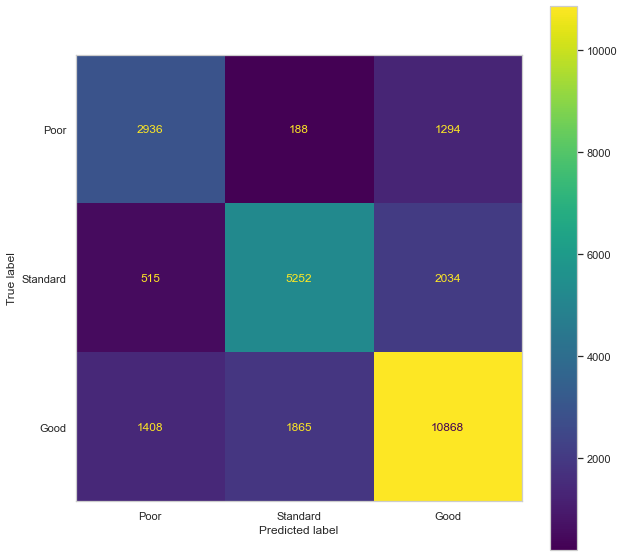

In [449]:
evaluate_classification(knn, "KNeighborsClassifiern", x_train,x_test,y_train,y_test)

In [450]:
Y_pred=knn.predict(x_test)

In [451]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(10).T

,5943,55462,18997,78093,65496,78593,76893,75831,49348,45868
Y_test,Standard,Standard,Poor,Good,Poor,Standard,Standard,Poor,Standard,Standard
Y_pred,Poor,Standard,Poor,Standard,Poor,Standard,Standard,Poor,Good,Standard


# Decision Tree

In [452]:
from sklearn.tree  import DecisionTreeClassifier

In [453]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state = 1234)

In [454]:
dt =DecisionTreeClassifier(max_features=14 ,    max_depth=12)

In [455]:
dt.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=12, max_features=14)

In [456]:
dt_score_train=dt.score(x_train , y_train)
dt_score_train

0.756556377530282

In [457]:
dt_score_test=dt.score(x_test , y_test)
dt_score_test

0.7184370257966616

Training Accuracy DecisionTreeClassifier 75.6556377530282  Test Accuracy DecisionTreeClassifier 71.84370257966616


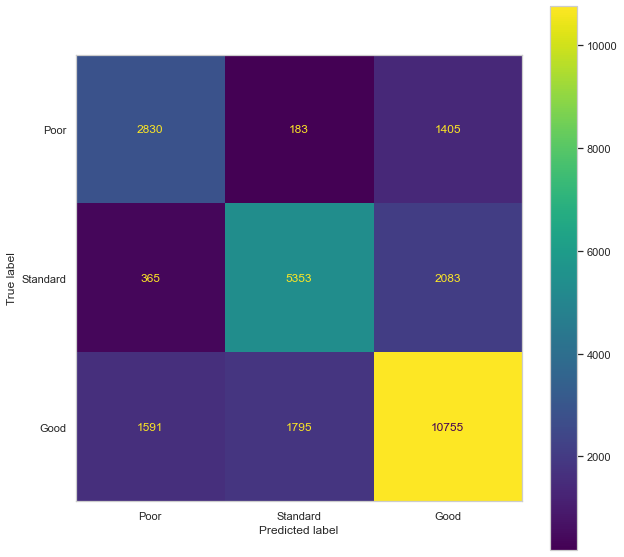

In [458]:
evaluate_classification(dt, "DecisionTreeClassifier", x_train,x_test,y_train,y_test)

In [459]:
Y_pred=dt.predict(x_test)

In [460]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(10).T

,5943,55462,18997,78093,65496,78593,76893,75831,49348,45868
Y_test,Standard,Standard,Poor,Good,Poor,Standard,Standard,Poor,Standard,Standard
Y_pred,Good,Standard,Poor,Standard,Poor,Standard,Standard,Poor,Standard,Standard


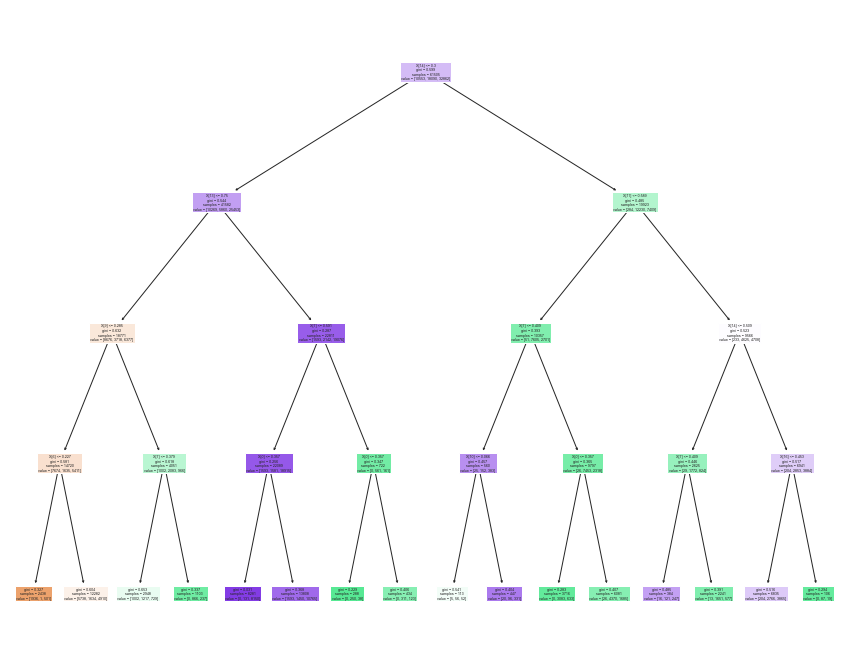

In [461]:
from sklearn import tree

#to a simple plot,We used max depth of 4
dtt = DecisionTreeClassifier(max_depth=4)

dtt.fit(x_train, y_train)
fig = plt.figure(figsize=(15,12))
tree.plot_tree(dtt , filled=True)
plt.show()

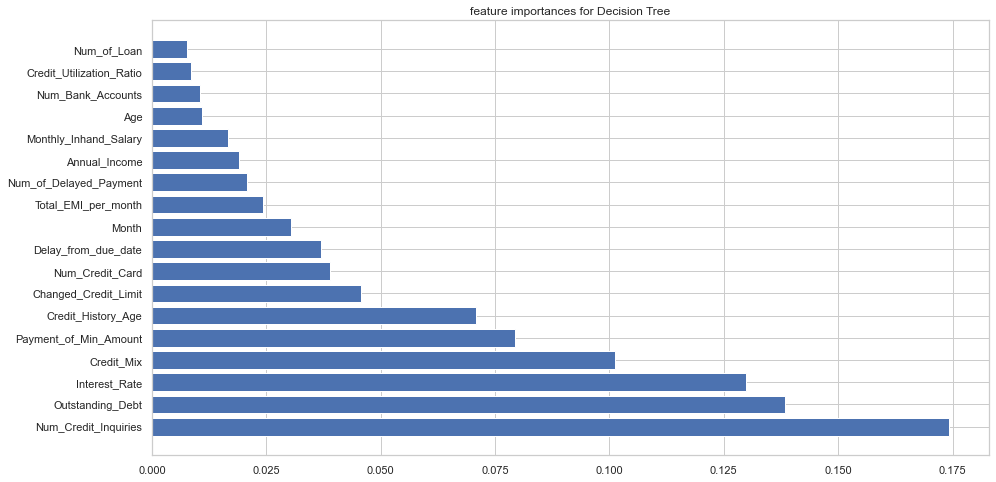

In [462]:
feature_importances(abs(dt.feature_importances_), features, top=18)

# Random forest

In [463]:
from sklearn.ensemble import RandomForestClassifier

In [464]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state = 1234)

In [465]:
rf = RandomForestClassifier(max_features=15 , max_depth=12)

In [466]:
rf.fit(x_train , y_train)

RandomForestClassifier(max_depth=12, max_features=15)

In [467]:
rf_score_train=rf.score(x_train , y_train)
rf_score_train

0.7937240874725632

In [468]:
rf_score_test=rf.score(x_test , y_test)
rf_score_test

0.7511760242792109

Training Accuracy RandomForestClassifier 79.37240874725632  Test Accuracy RandomForestClassifier 75.1176024279211


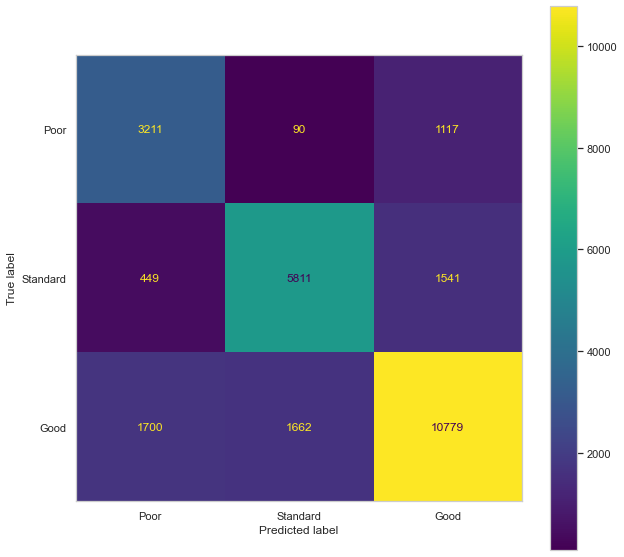

In [469]:
evaluate_classification(rf, "RandomForestClassifier", x_train,x_test,y_train,y_test)

In [470]:
Y_pred=rf.predict(x_test)

In [471]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(20).T

,5943,55462,18997,78093,65496,78593,76893,75831,49348,45868,53503,49609,3824,37658,83597,75101,12350,96920,31320,3501
Y_test,Standard,Standard,Poor,Good,Poor,Standard,Standard,Poor,Standard,Standard,Standard,Poor,Good,Standard,Poor,Standard,Standard,Standard,Good,Poor
Y_pred,Good,Standard,Poor,Standard,Poor,Standard,Standard,Poor,Standard,Standard,Standard,Poor,Good,Poor,Poor,Standard,Standard,Standard,Standard,Standard


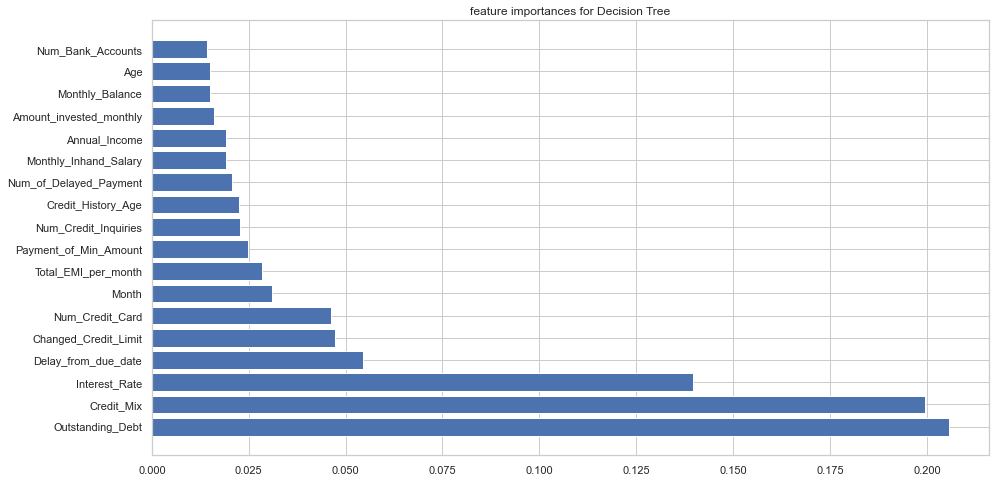

In [472]:
feature_importances(abs(rf.feature_importances_), features, top=18)

# XGBOOST

In [473]:
from xgboost import XGBClassifier

In [474]:
x_train,x_test,y_train,y_test = train_test_split(x,y_Encode, test_size=0.3,random_state = 1234)

In [475]:
xgb = XGBClassifier(max_depth = 5 , learning_rate = 0.3 , objective = 'binary:logistic' , n_estimators= 5, random_state=42)

In [476]:
xgb.fit(x_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=5, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [477]:
xgb_score_train=xgb.score(x_train , y_train)
xgb_score_train

0.7200065035362979

In [478]:
xgb_score_test=xgb.score(x_test , y_test)
xgb_score_test

0.7175644916540213

Training Accuracy XGBOOST 72.0006503536298  Test Accuracy XGBOOST 71.75644916540213


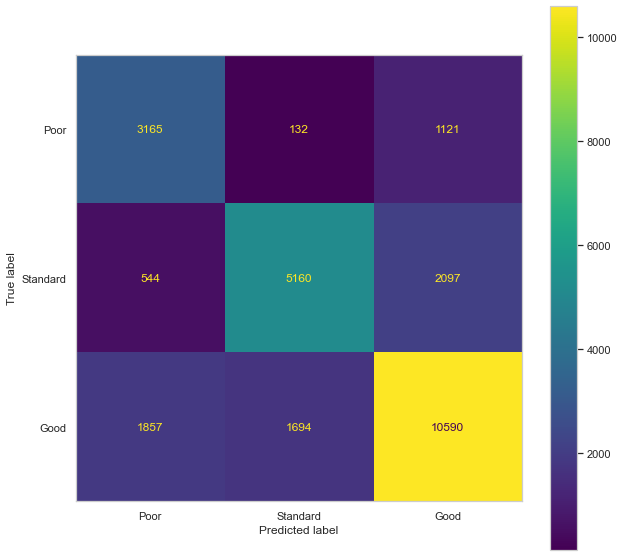

In [479]:
evaluate_classification(xgb, "XGBOOST", x_train,x_test,y_train,y_test)

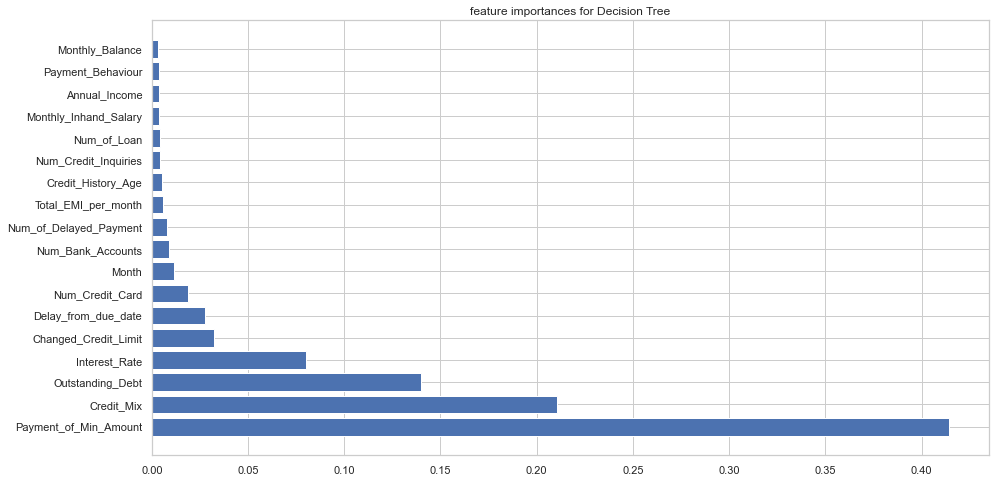

In [480]:
feature_importances(abs(xgb.feature_importances_), features, top=18)

In [481]:
Y_pred=xgb.predict(x_test)

In [482]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
Y_test,2,2,1,0,1,2,2,1,2,2
Y_pred,0,0,1,2,1,2,2,1,2,2


# adaboost

In [483]:
from sklearn.ensemble import AdaBoostClassifier

In [484]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state = 1234)

In [485]:
ada = AdaBoostClassifier(n_estimators=8, learning_rate=0.8)

In [486]:
ada.fit(x_train , y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=8)

In [487]:
ada_score_train=ada.score(x_train , y_train )
ada_score_train

0.6371839687830257

In [488]:
ada_score_test=ada.score(x_test , y_test)
ada_score_test

0.6345599393019726

Training Accuracy adaboost 63.71839687830258  Test Accuracy adaboost 63.455993930197266


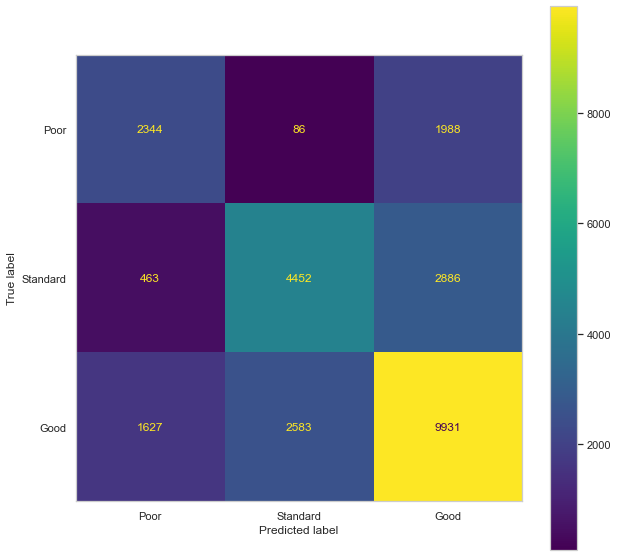

In [489]:
evaluate_classification(ada, "adaboost", x_train,x_test,y_train,y_test)

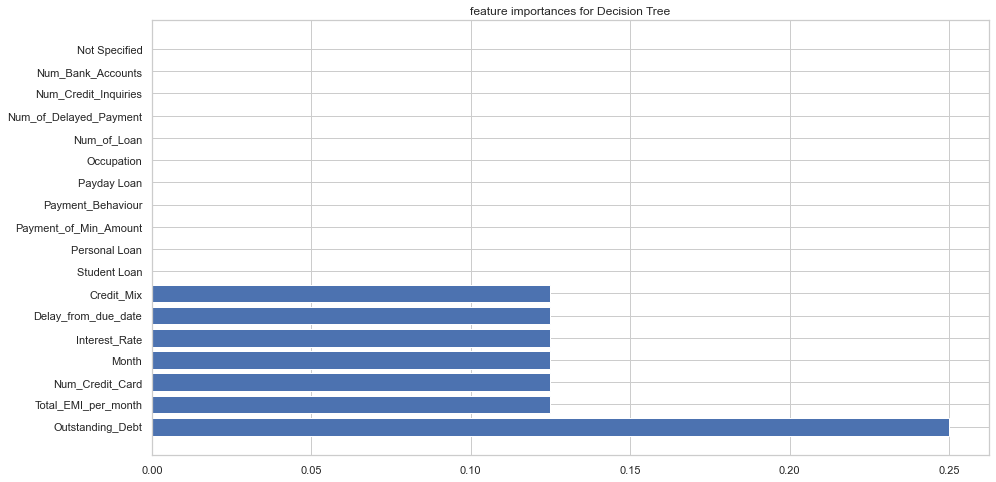

In [490]:
feature_importances(abs(ada.feature_importances_), features, top=18)

In [491]:
Y_pred=ada.predict(x_test)

In [492]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(20).T

,5943,55462,18997,78093,65496,78593,76893,75831,49348,45868,53503,49609,3824,37658,83597,75101,12350,96920,31320,3501
Y_test,Standard,Standard,Poor,Good,Poor,Standard,Standard,Poor,Standard,Standard,Standard,Poor,Good,Standard,Poor,Standard,Standard,Standard,Good,Poor
Y_pred,Good,Good,Poor,Standard,Poor,Standard,Standard,Standard,Good,Standard,Standard,Poor,Standard,Poor,Poor,Standard,Good,Standard,Standard,Good


# Voting

In [493]:
from sklearn.ensemble import VotingClassifier

In [494]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state = 1234)

In [495]:
clf1 = LogisticRegression(C = 100)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = DecisionTreeClassifier(max_features=14 ,    max_depth=12)
clf4 = RandomForestClassifier(max_features=15 , max_depth=12)
clf5 = XGBClassifier(max_depth = 5 , learning_rate = 0.3 , objective = 'binary:logistic' , n_estimators= 5, random_state=42)
clf6 = AdaBoostClassifier(n_estimators=8, learning_rate=0.8)

In [496]:
v_clf = VotingClassifier(estimators=[("LogisticRegression" , clf1) , ('KNeighborsClassifier' , clf2) ,
                                     ("XGBClassifier" , clf5) ,("RandomForestClassifier" , clf4),
                                     ("DecisionTreeClassifier",clf3),("AdaBoostClassifier",clf6)] , voting = "hard")

In [497]:
v_clf.fit(x_train , y_train)

VotingClassifier(estimators=[('LogisticRegression', LogisticRegression(C=100)),
                             ('KNeighborsClassifier',
                              KNeighborsClassifier(n_neighbors=7)),
                             ('XGBClassifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,...
                                            monotone_constraints=None,
                                            n_estimators=5, n_jobs=None,
                                            num_parallel_tree=N

In [498]:
v_clf_score_train=v_clf.score(x_train , y_train)
v_clf_score_train

0.7665230469067555

In [499]:
v_clf_score_test=v_clf.score(x_test , y_test)
v_clf_score_test

0.7352048558421851

Training Accuracy Voting 76.65230469067555  Test Accuracy Voting 73.5204855842185


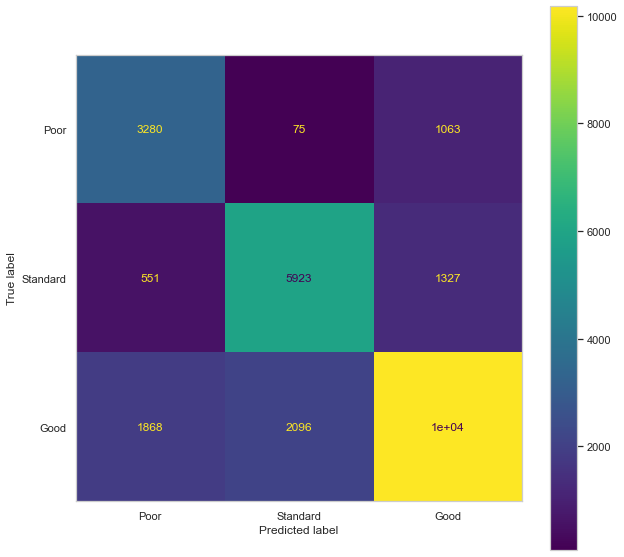

In [500]:
evaluate_classification(v_clf, "Voting", x_train,x_test,y_train,y_test)

In [501]:
Y_pred=v_clf.predict(x_test)

In [502]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(10).T

,5943,55462,18997,78093,65496,78593,76893,75831,49348,45868
Y_test,Standard,Standard,Poor,Good,Poor,Standard,Standard,Poor,Standard,Standard
Y_pred,Good,Standard,Poor,Standard,Poor,Standard,Standard,Poor,Standard,Standard


# comparsion between models

In [504]:
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBOOST', 'AdaBoost', 'Voting']
scores = [[lr_score_train, lr_score_test], [knn_score_train, knn_score_test], [dt_score_train, dt_score_test],
[rf_score_train, rf_score_test], [xgb_score_train, xgb_score_test], [ada_score_train, ada_score_test],
[v_clf_score_train, v_clf_score_test]]
columns = ["Train Score", "Test Score"]
models_df = pd.DataFrame(data=scores, index=models, columns=columns)
models_df = models_df.sort_values(ascending=False, by=["Test Score", "Train Score"])

In [505]:
models_df

,Train Score,Test Score
Random Forest,0.793724,0.751176
Voting,0.766523,0.735205
KNN,0.803008,0.722914
Decision Tree,0.756556,0.718437
XGBOOST,0.720007,0.717564
Logistic Regression,0.652809,0.652504
AdaBoost,0.637184,0.634560


The higher the training accuracy, the better the model is at fitting the  data. However, a high training accuracy does not necessarily mean the model is good at generalizing to new, unseen data, which is what the test accuracy measures.

So, the model with the higher test accuracy score is considered to be the better model, as it has a better ability to generalize to new data.

From this we may say that Random Forest is the best fitting model.